In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from time import time
import matplotlib.pyplot as plt
from figure_manager import FigureManager
from plots import *

import DynamicTimeAllocationModel

path = 'output/'

fm = FigureManager(path, use_latex=False)

# c++ settings
do_compile = True
threads = 100

# from EconModel import cpptools
# cpptools.setup_nlopt(folder='cppfuncs/', do_print=True)

# Solve and simulate from alternative models

Benchmark model settings

In [2]:
# settings = { 
#        'T':20,
#        'num_A': 15,
#        'num_A_pd': 16,
#        'num_K': 12,
#        'num_power': 11,
#        'num_love': 6,

#        'simT': 20,
#        'simN': 1000,

#        'num_Ctot': 120,
#        'num_marg_u':120,

#        'phi': 1.0,
#        'phi_mult': 1.0,
       
#        'mu': 0.3,
#        'mu_mult': 1.0,
       
#        'p_meet': 0.3,

#        'threads':threads,
#        'num_multistart': 2,
       
#        'do_egm': False,
#        'interp_method': 'linear',
#        'interp_inverse': False,
       
#        'precompute_intratemporal': True,
#        'centered_gradient': True,
#        }

In [3]:
settings = { 
       'T':30,
       'num_A': 15,
       'num_A_pd': 16,
       'num_K': 12,
       'num_power': 11,
       'num_love': 6,
       
       'max_A': 1000,
       'max_A_pd': 1000,
       'max_Ctot': 2000,
       'max_K': 50,
       
       'init_couple_share': 0.77,
       
       'simT': 30,
       'simN': 10_000,

       'num_Ctot': 420,
       'num_marg_u':420,
       
       'beta': 0.98,
       'R': 1/0.98,
       'rho': 1.5,
       
       
       'p_meet': 0.0,

       'threads':threads,
       'num_multistart': 2,
       
       'do_egm': True,
       'interp_method': 'linear',
       'interp_inverse': True,
       
       'precompute_intratemporal': True,
       'centered_gradient': True,
       
    'mu': 3.8, 
    'mu_mult': 1.08,
    'gamma': 0.03,
    'gamma_mult': 1.08,
    'gamma2': -0.001,
    'gamma2_mult': 1.0,
    
    'sigma_K': 0.05,
    
    'eta'            : 2.85,
    'eta_mult'       : 1.0,
    'phi'            : 1.97,
    'phi_mult'       : 1.0,

    'alpha'          : 1.18,
    'zeta'           : 0.40,
    'omega'          : 0.38,
    'pi'             : 0.5,
    
    'lambda_'        : 13.0,
    
    'phi_k'          : 0.4,
    
    'tax_rate'       : 0.25,
    'available_hours': 1,
    'full_time_hours': 0.36,
    
    'sigma_love': 1.0,
    'div_cost': 0.0,
}

In [4]:
show_iEGM = True
show_VFI = False
show_numEGM = False
show_iEGMinv = False

In [5]:
if show_iEGM:
    settings_iEGM = settings.copy()
    settings_iEGM['do_egm'] = True
    settings_iEGM['interp_method'] = 'linear'
    settings_iEGM['interp_inverse'] = False
    
    model_iEGM = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_iEGM)
    model_iEGM.link_to_cpp(force_compile=do_compile)

    %time model_iEGM.solve()
    %time model_iEGM.simulate()
    
    model_iEGM.cpp.delink()

CPU times: total: 2min 15s
Wall time: 13.8 s
CPU times: total: 1.61 s
Wall time: 64.6 ms


In [6]:
if show_VFI:
    settings_VFI = settings.copy()
    settings_VFI['do_egm'] = False
    
    model_VFI = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_VFI)
    model_VFI.link_to_cpp(force_compile=do_compile)
    
    %time model_VFI.solve()
    %time model_VFI.simulate()

    model_VFI.cpp.delink()

In [7]:
if show_numEGM:
    settings_numEGM = settings.copy()
    settings_numEGM['do_egm'] = True
    settings_numEGM['interp_method'] = 'numerical'
    
    model_numEGM = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_numEGM)
    model_numEGM.link_to_cpp(force_compile=do_compile)
    
    %time model_numEGM.solve()
    %time model_numEGM.simulate()
    
    model_numEGM.cpp.delink()

In [8]:
if show_iEGMinv:
    settings_iEGMinv = settings.copy()
    settings_iEGMinv['do_egm'] = True
    settings_iEGMinv['interp_method'] = 'linear'
    settings_iEGMinv['interp_inverse'] = True
    
    model_iEGMinv = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_iEGMinv)
    model_iEGMinv.link_to_cpp(force_compile=do_compile)
    
    %time model_iEGMinv.solve()
    %time model_iEGMinv.simulate()
 
    model_iEGMinv.cpp.delink()

In [9]:
model_iEGM.par.grid_l

array([0.  , 0.27, 0.36])

Setup plotters

In [10]:
if show_iEGM:    mp_iEGM = model_plotter(model_iEGM, model_name='iEGM', titles=['variable'], labels=['model', 'index'])
if show_VFI:     mp_VFI = model_plotter(model_VFI, model_name='VFI', titles=['variable'], labels=['model', 'index'])
if show_numEGM:  mp_numEGM = model_plotter(model_numEGM, model_name='numEGM', titles=['variable'], labels=['model', 'index'])
if show_iEGMinv: mp_iEGMinv = model_plotter(model_iEGMinv, model_name='iEGMinv', titles=['variable'], labels=['model', 'index'])

save_figures = False
grid = 'grid_A'
idx = {'t': 0, 'il':2, 'iK': 10, 'iP': 5, 'iL': 3, 'iA': 10, 'iA_pd': 10}
t, iK, iP, iL, iA = idx['t'], idx['iK'], idx['iP'], idx['iL'], idx['iA']

## Singles solution

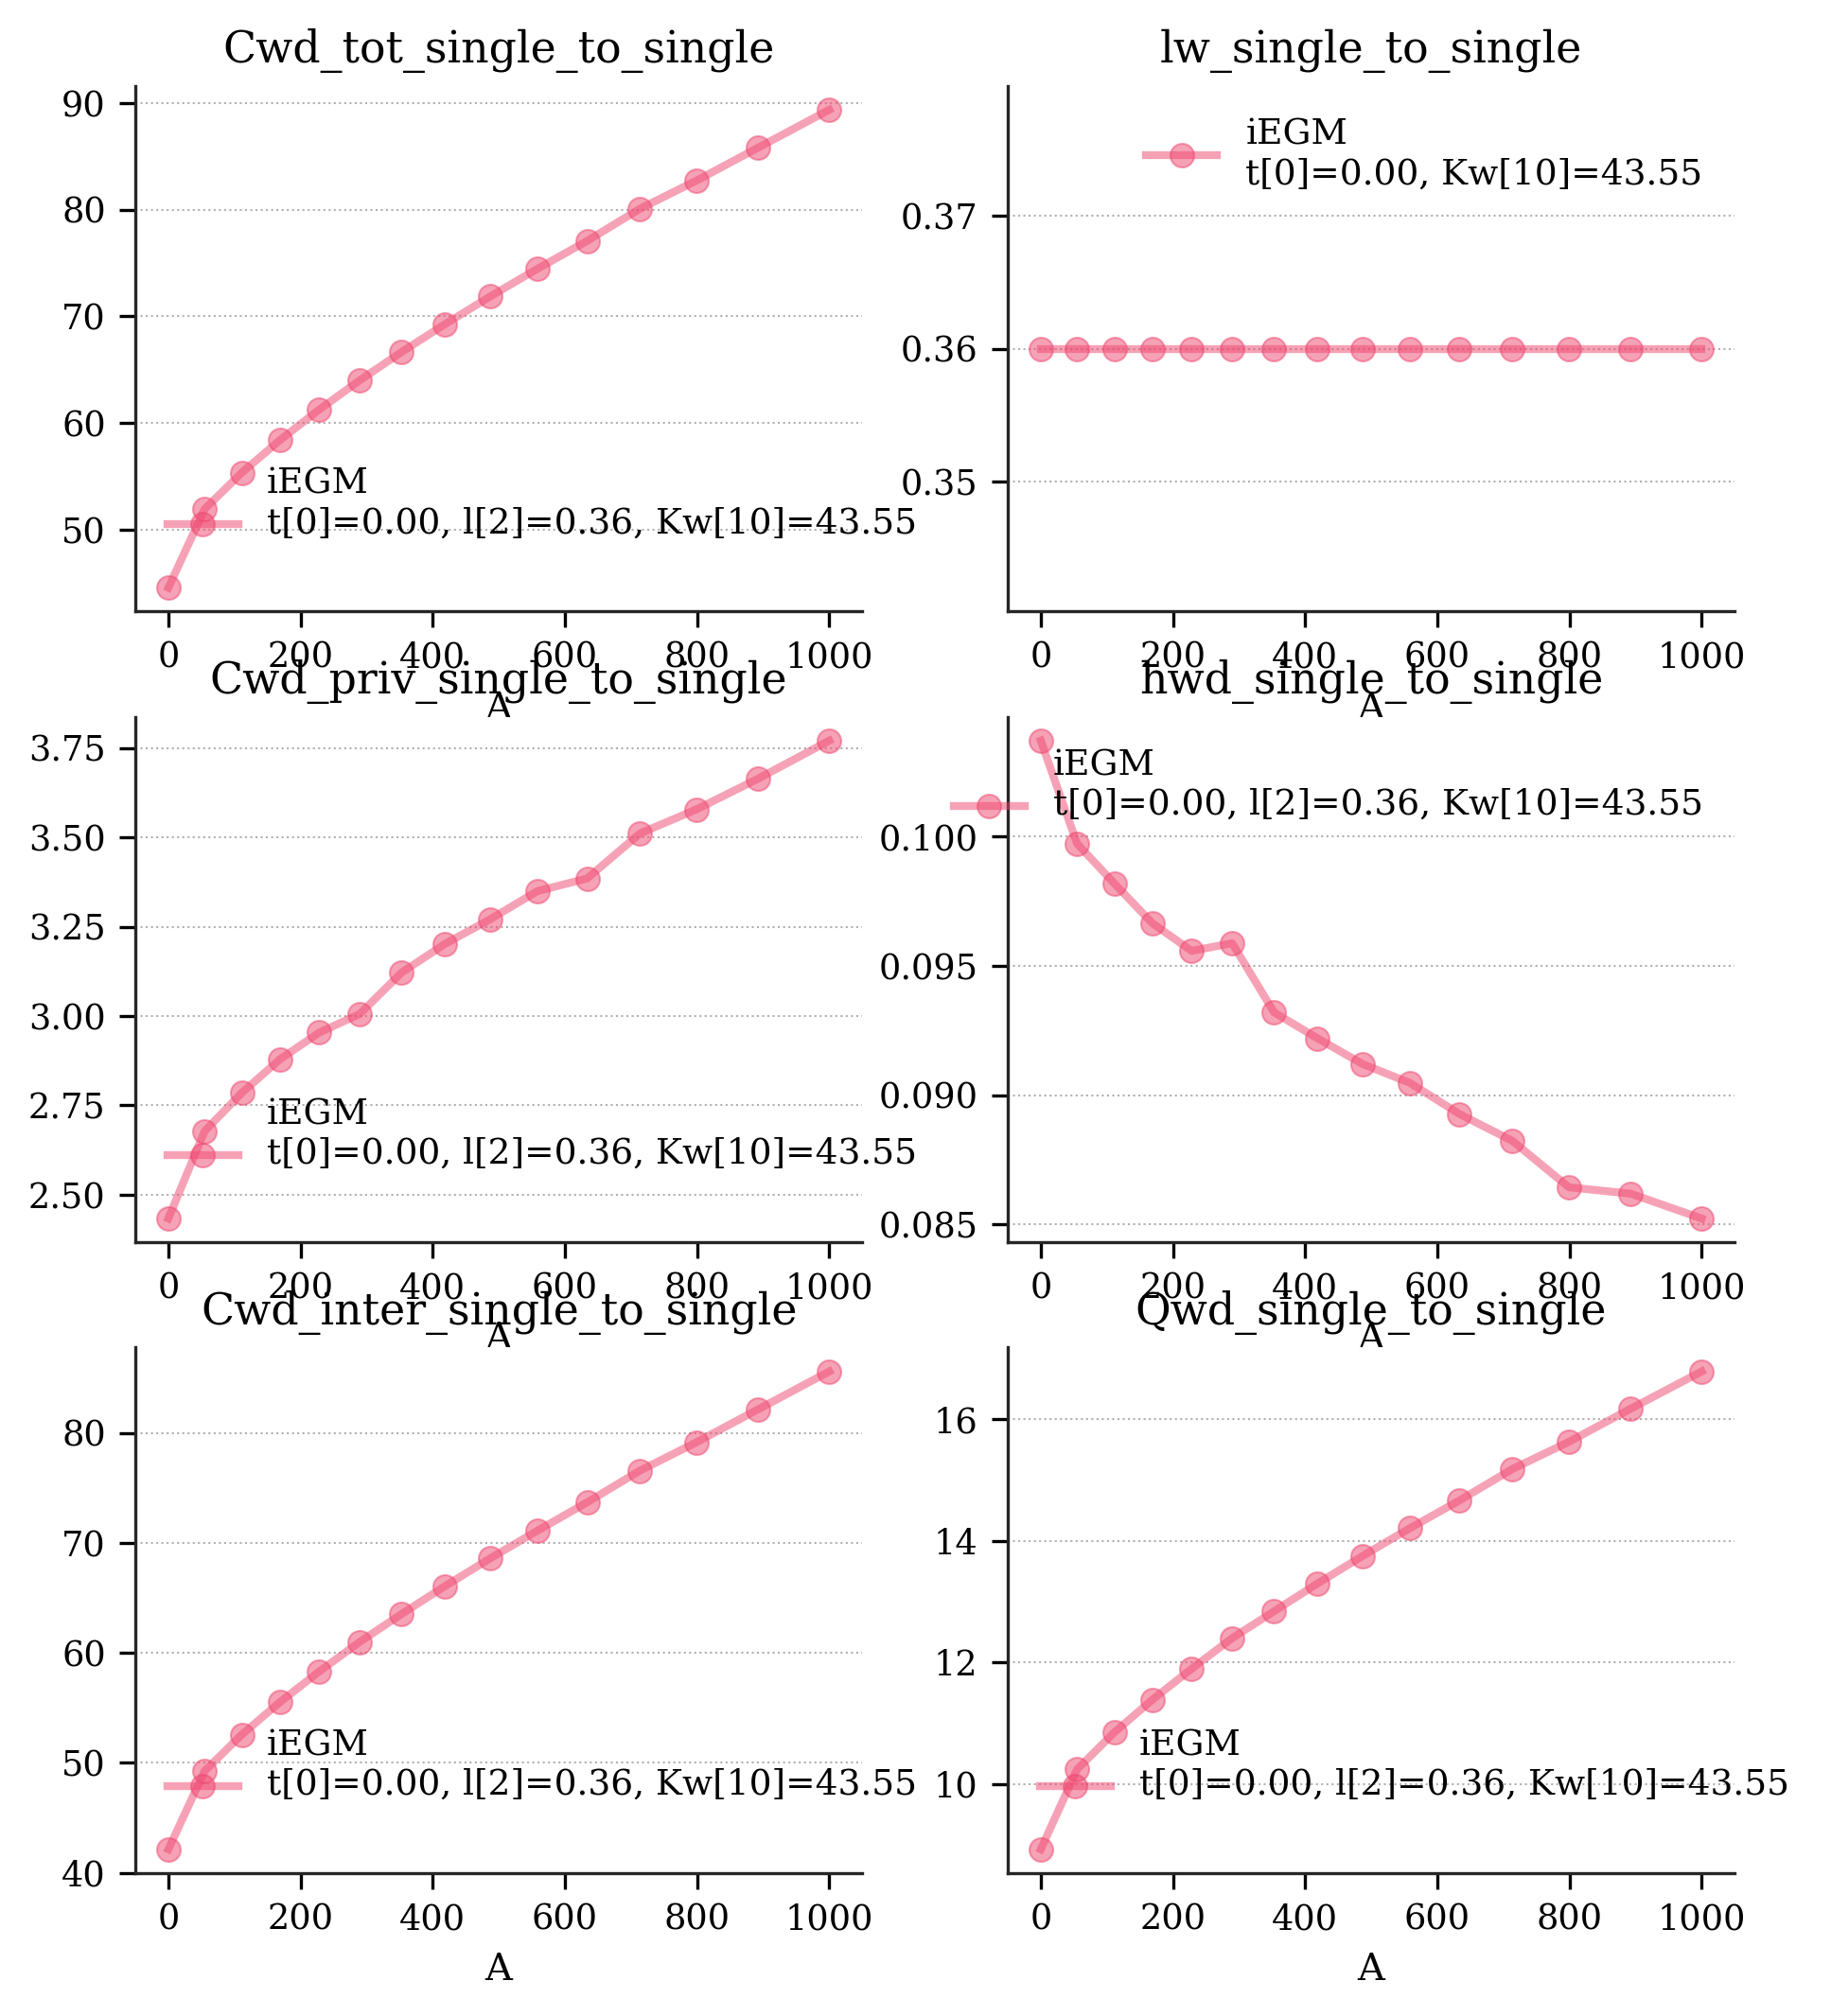

In [11]:
fig, ax = fm.create_figure(3,2,6)
if show_iEGM:    mp_iEGM.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="female_single_choices")

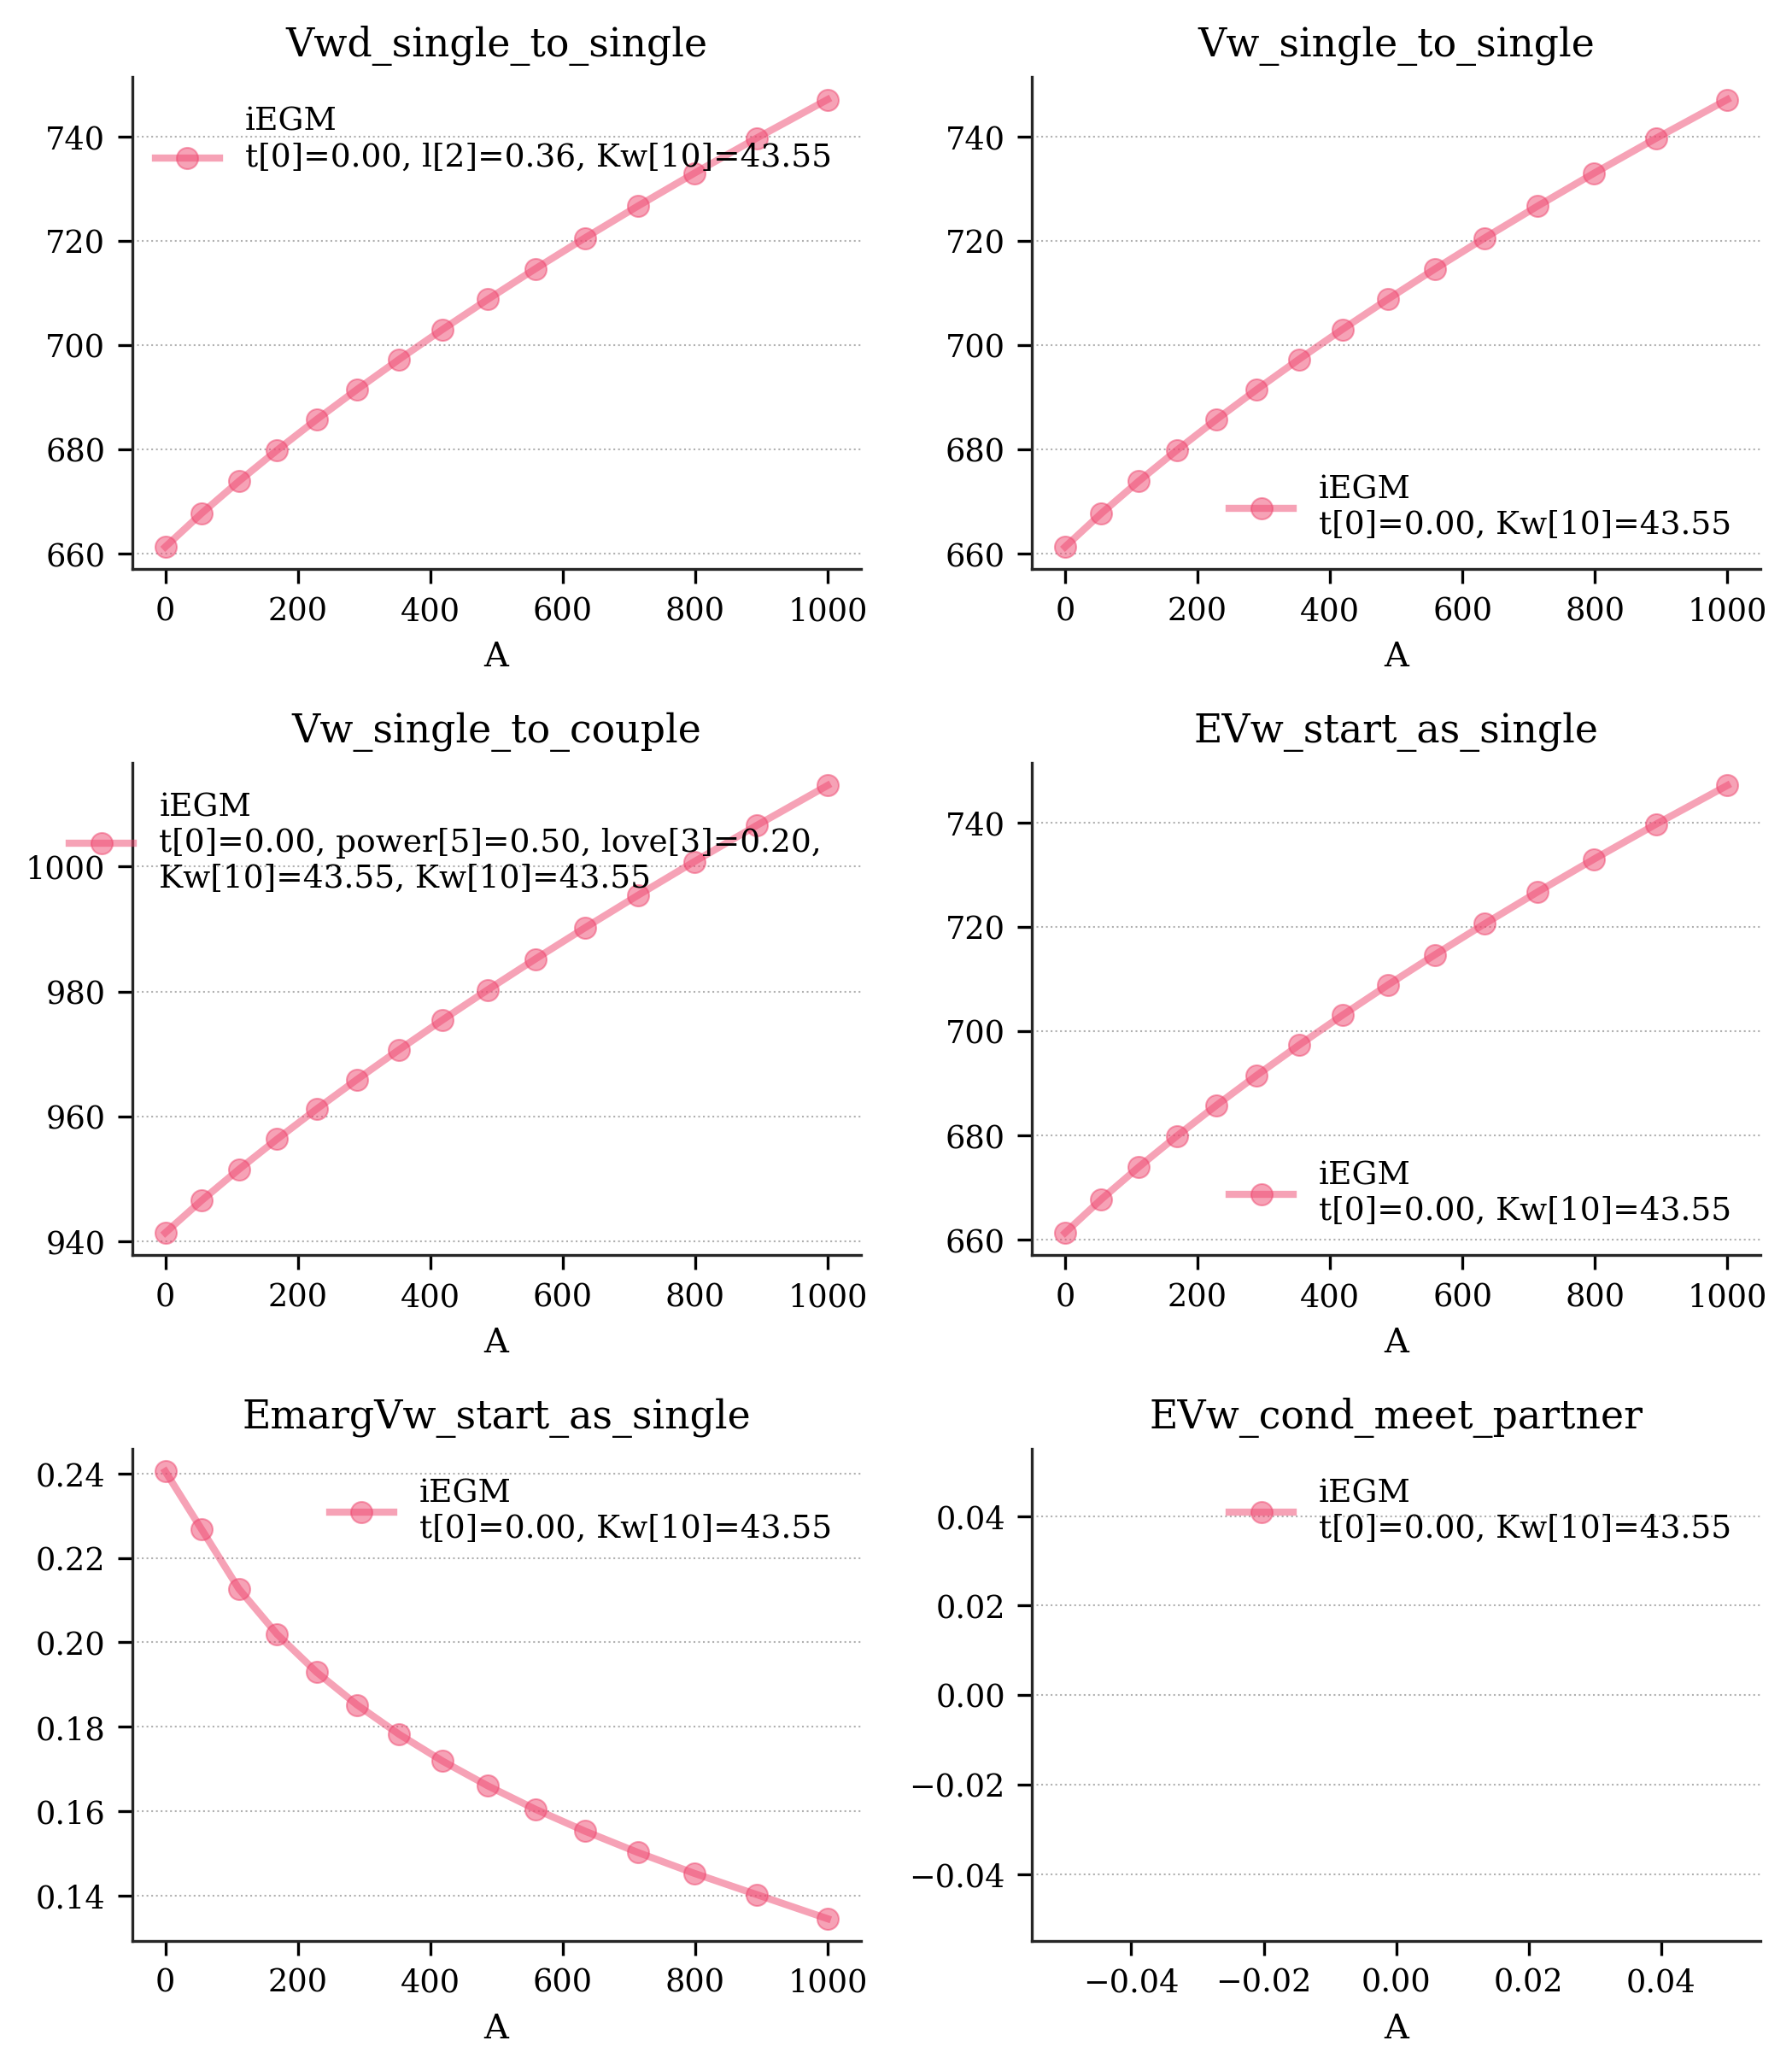

In [12]:
fig, ax = fm.create_figure(3,2,6)
if show_iEGM:    mp_iEGM.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="female_single_values")
else: fig.tight_layout()

## Couples solution

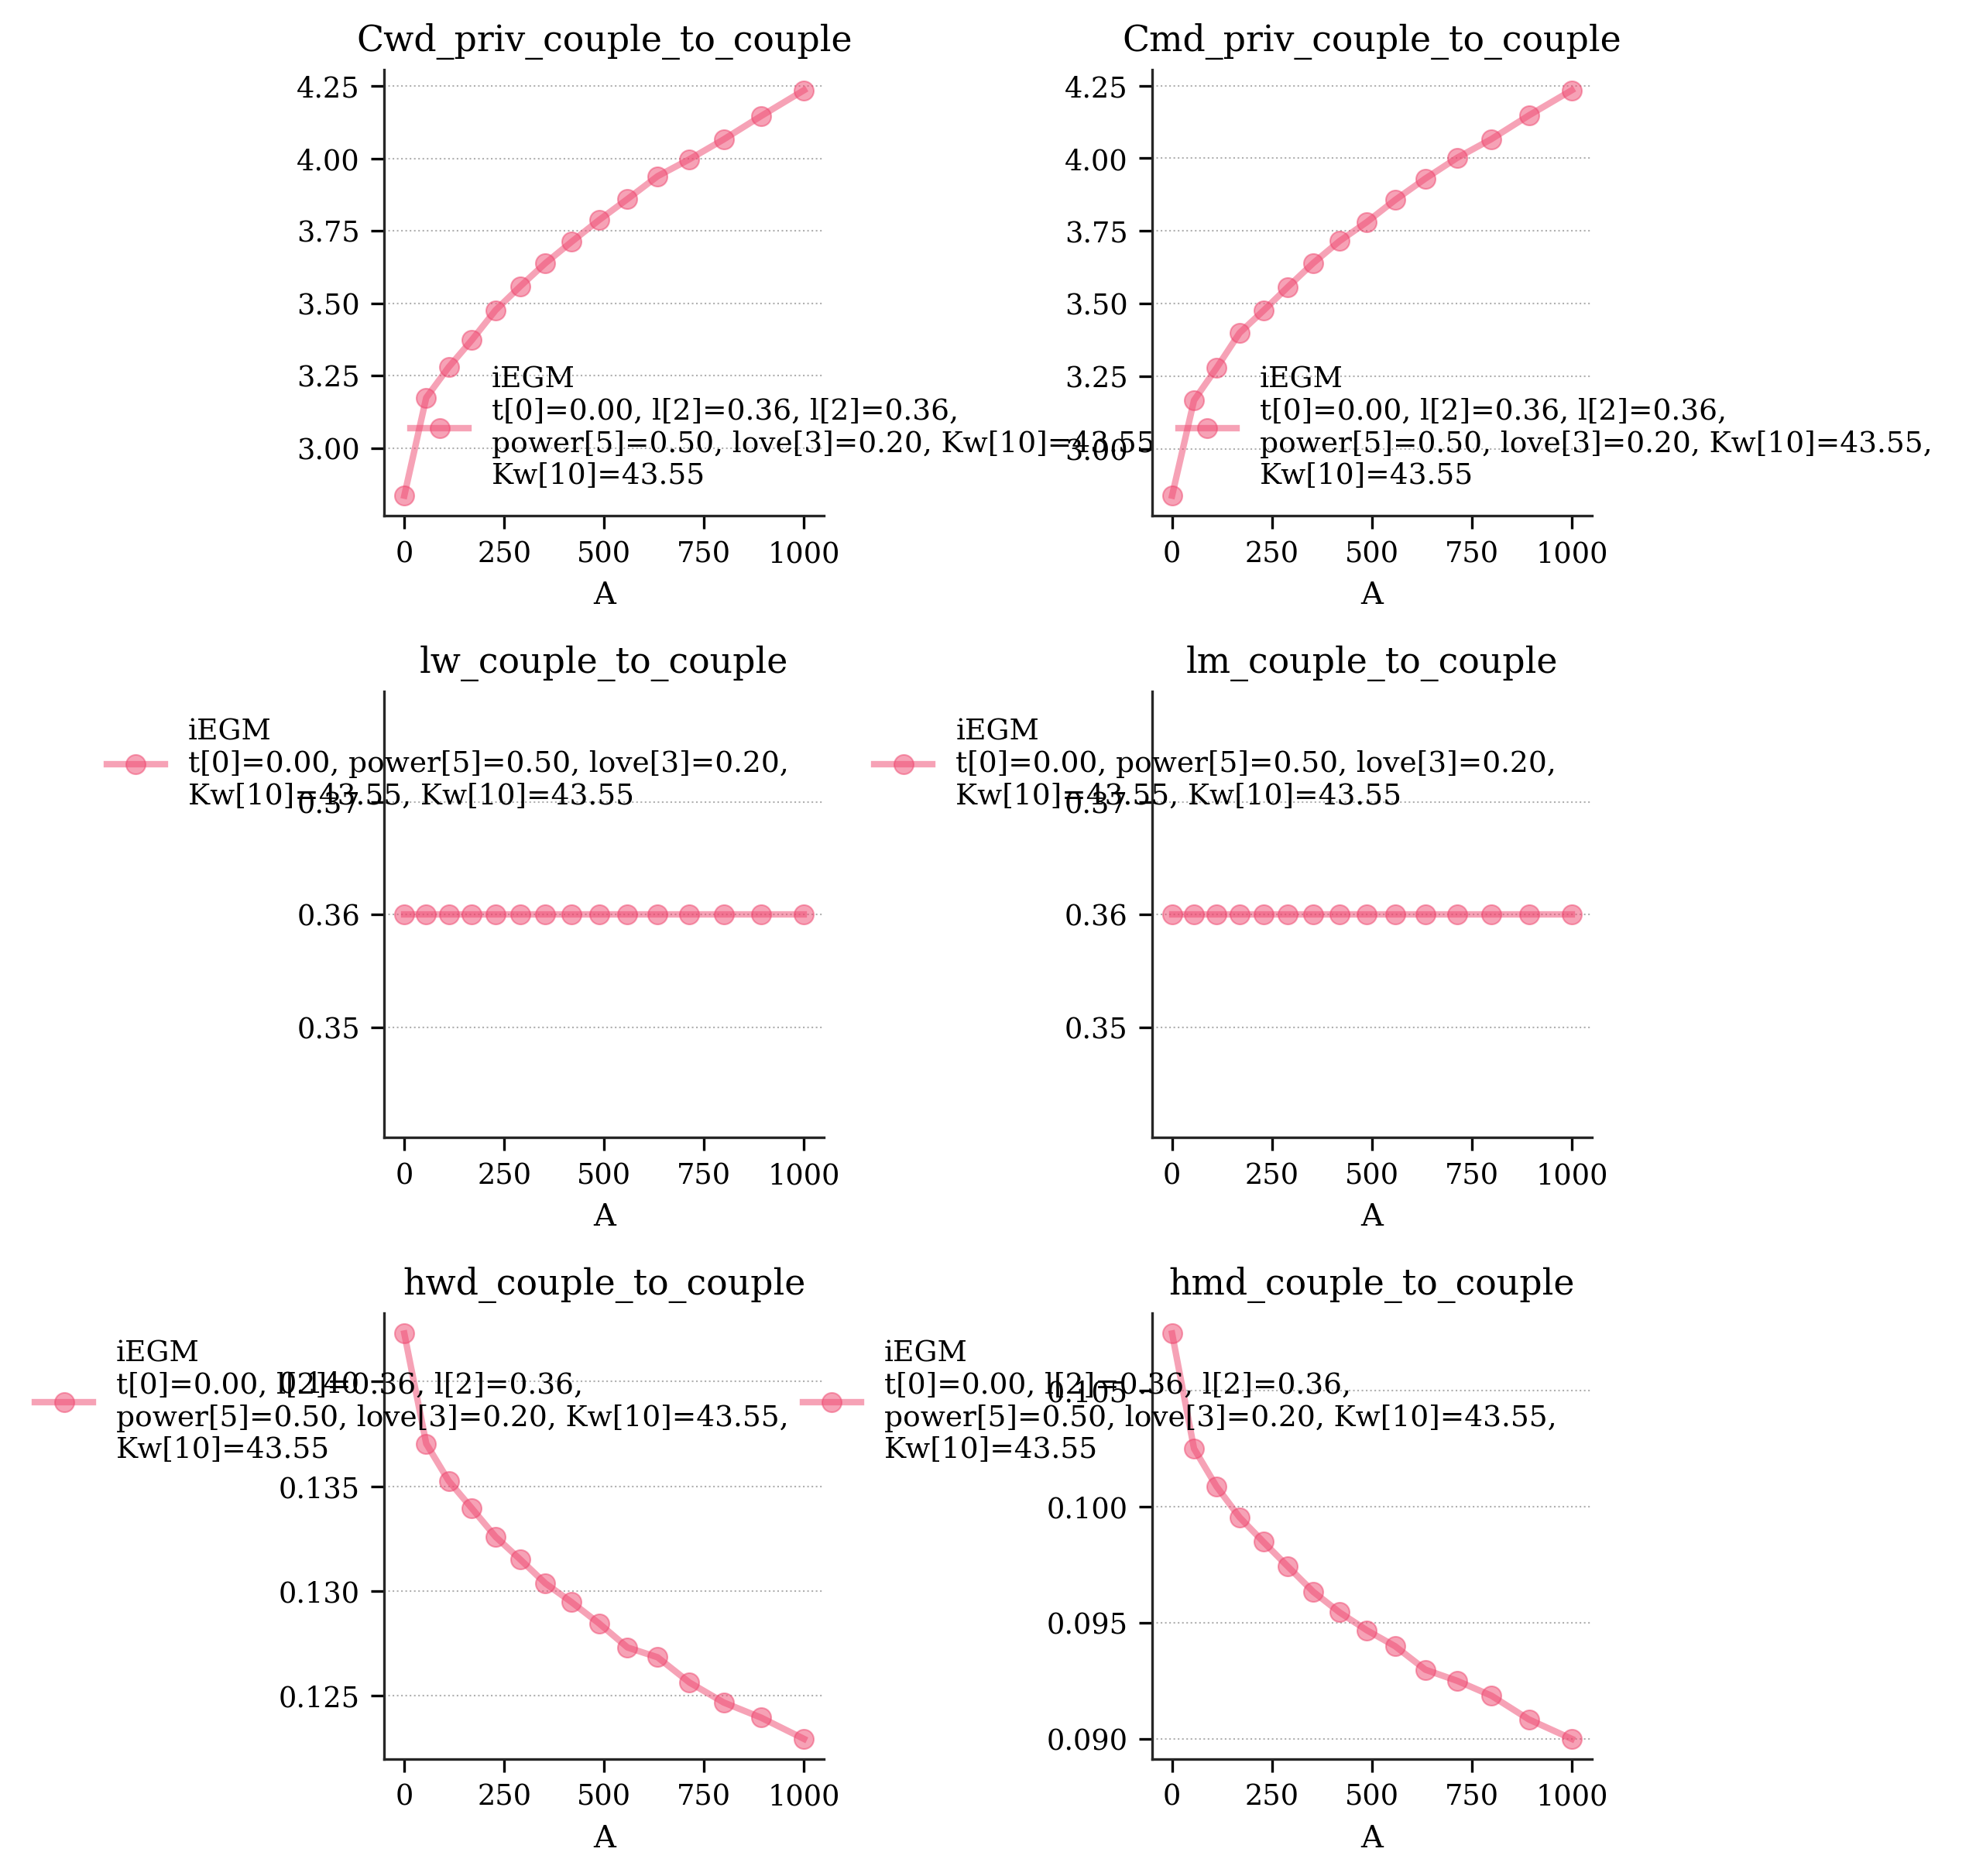

In [13]:
fig, ax = fm.create_figure(3,2,6)
if show_iEGM:    mp_iEGM.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="gender_couple_choices")
else: fig.tight_layout()

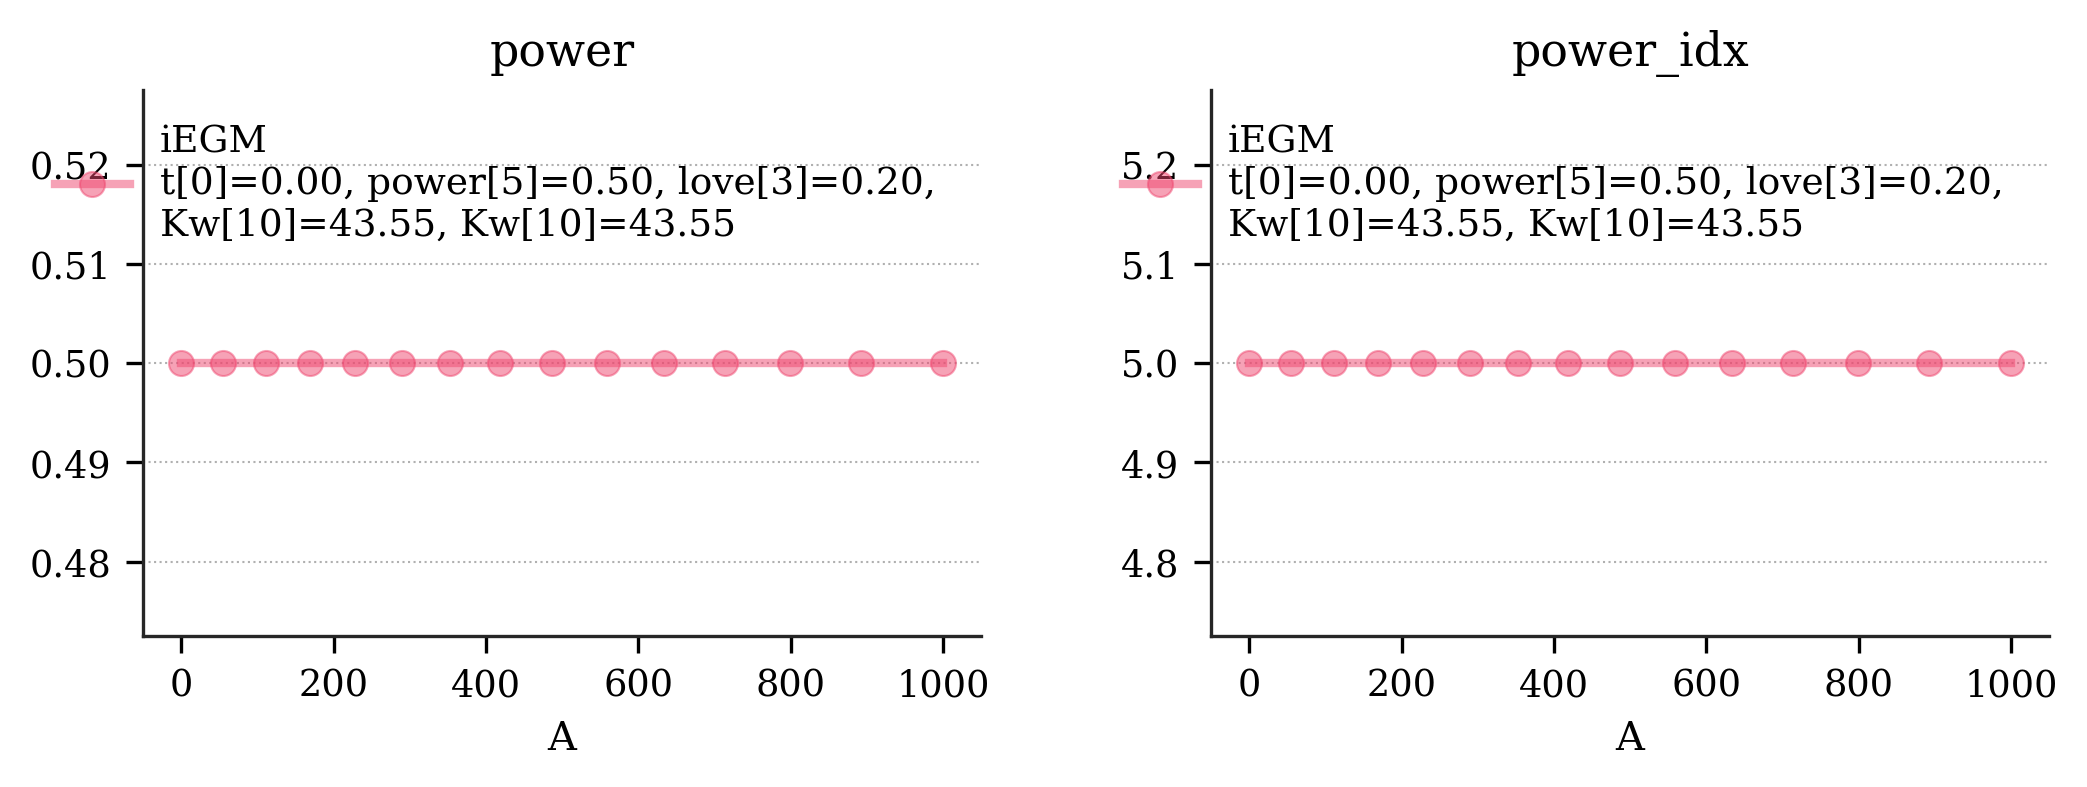

In [14]:
# model_iEGM.sol.power.shape #[idx['t'], idx['iP'], idx['iL'], :]
fig, ax = fm.create_figure(1,2,2)
if show_iEGM:    mp_iEGM.plot_power(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_power(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_power(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_power(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="power")
else: fig.tight_layout()

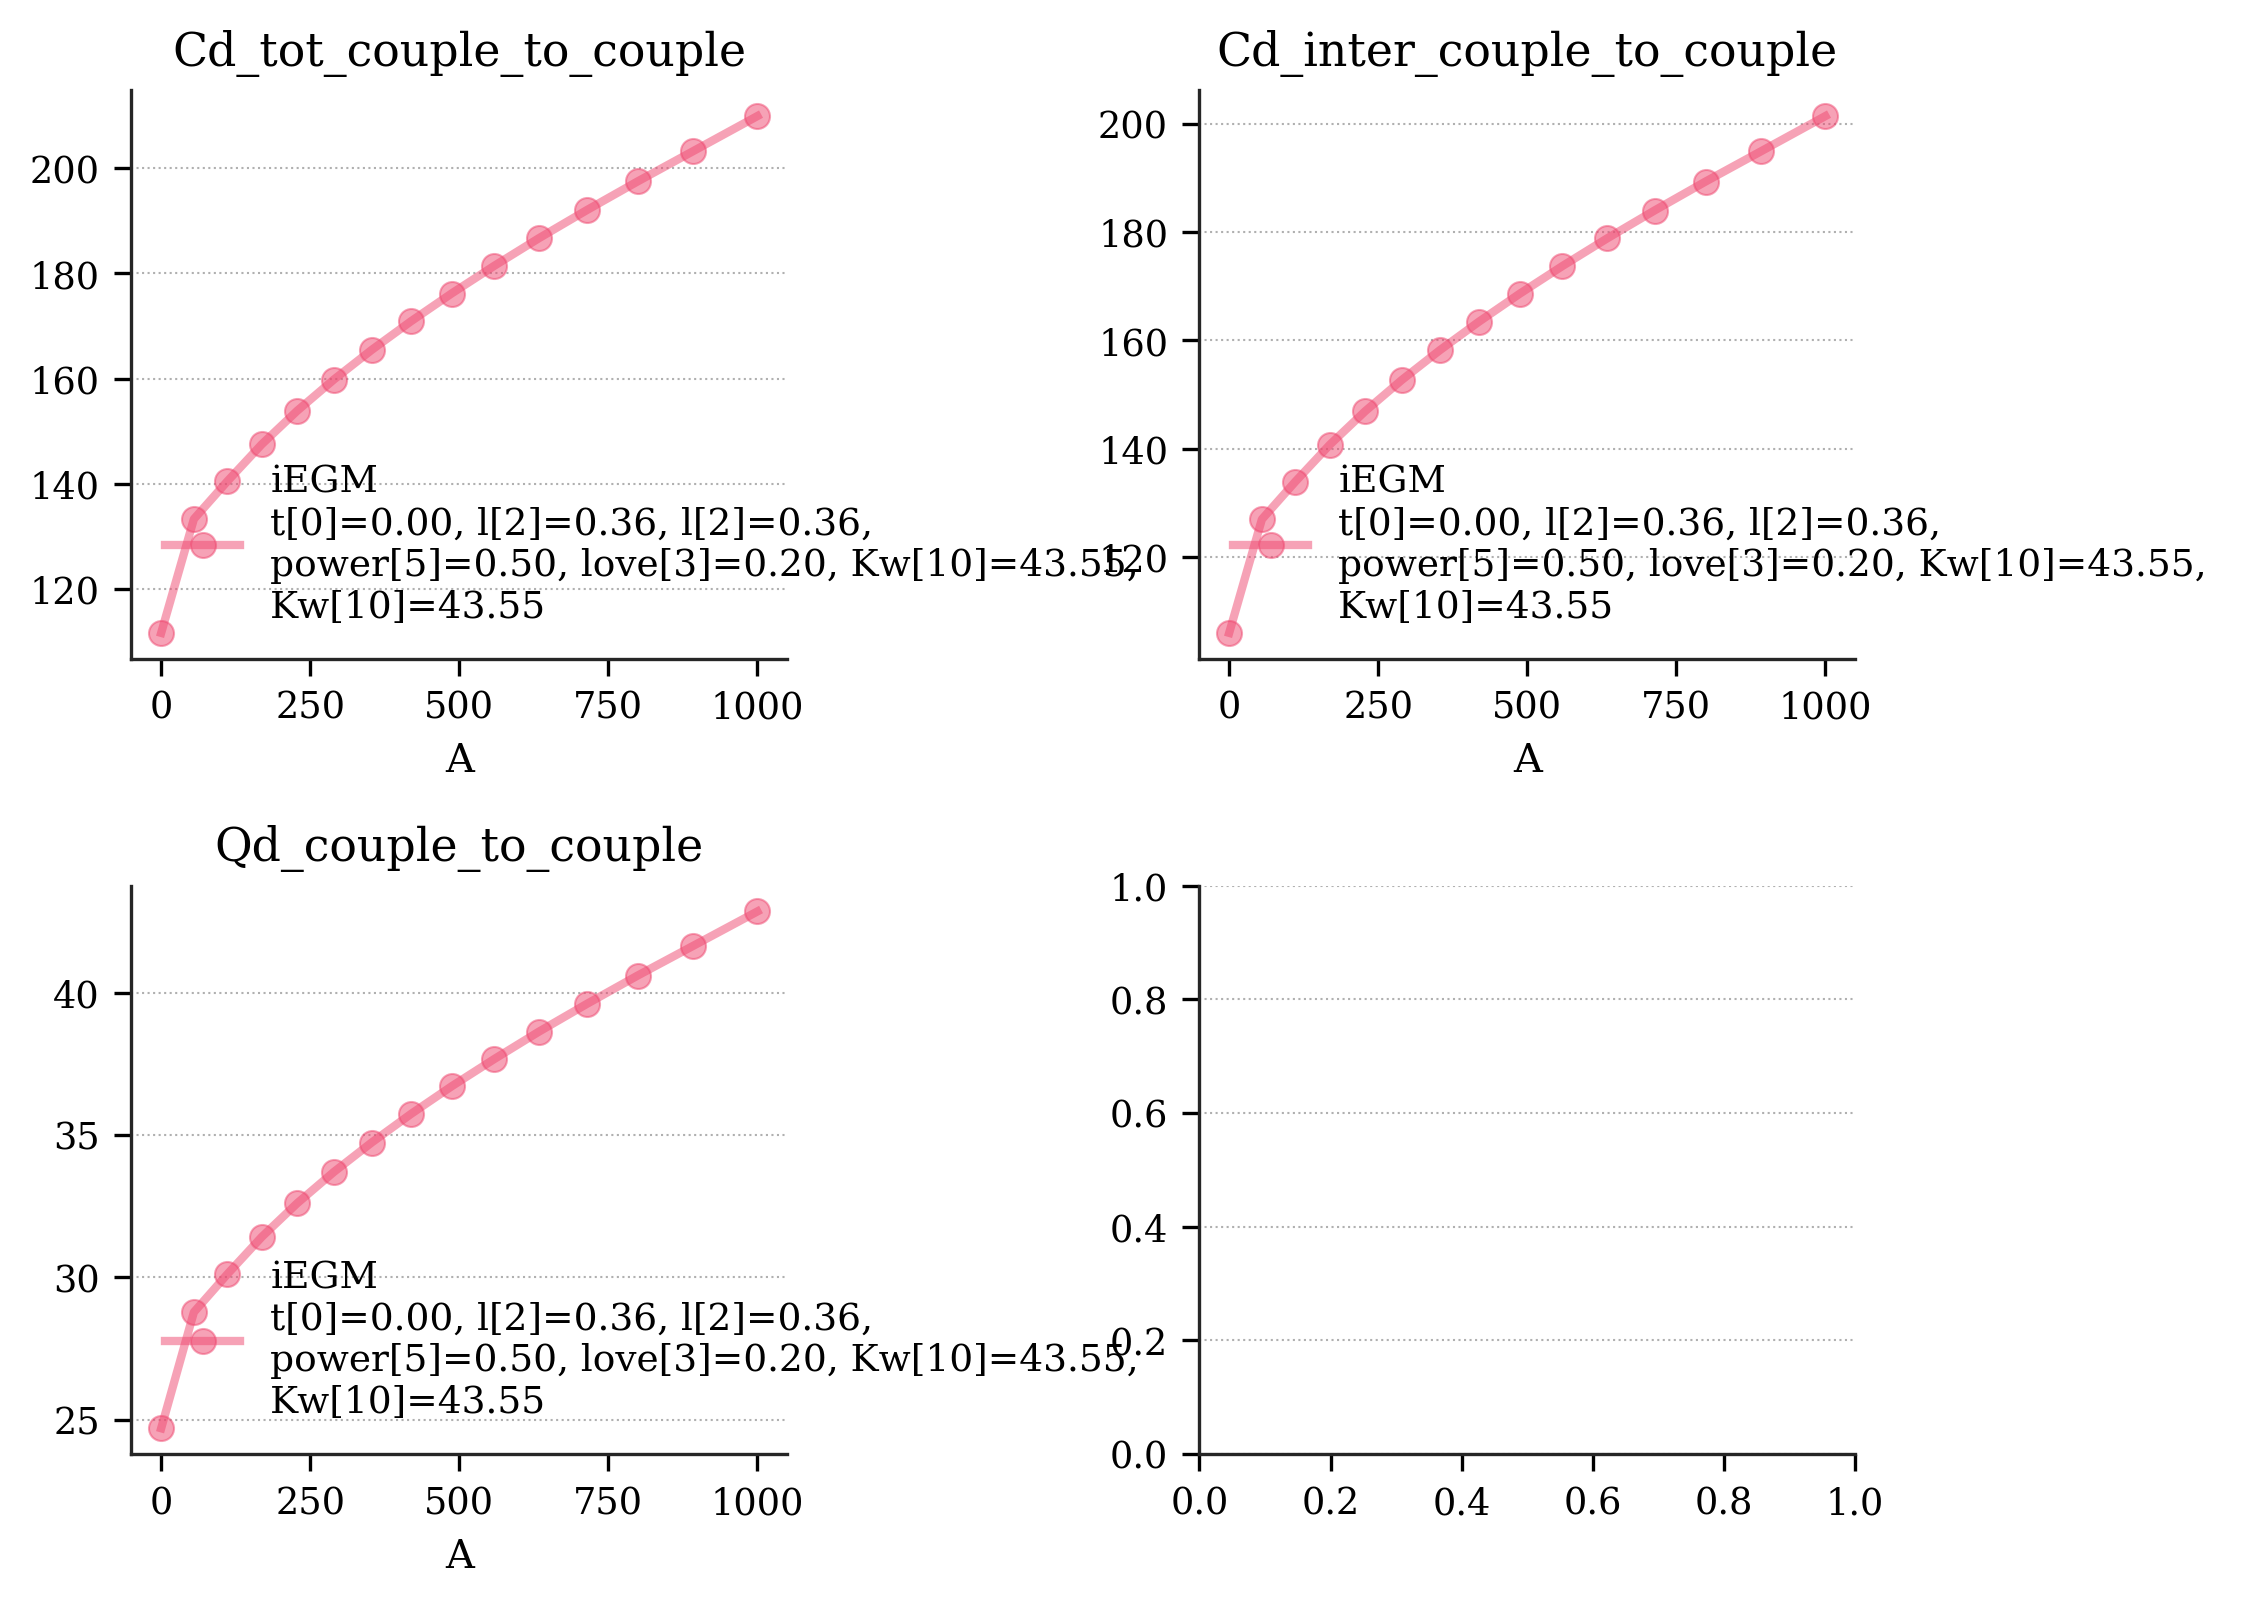

In [15]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="total_couple_choices")
else: fig.tight_layout()


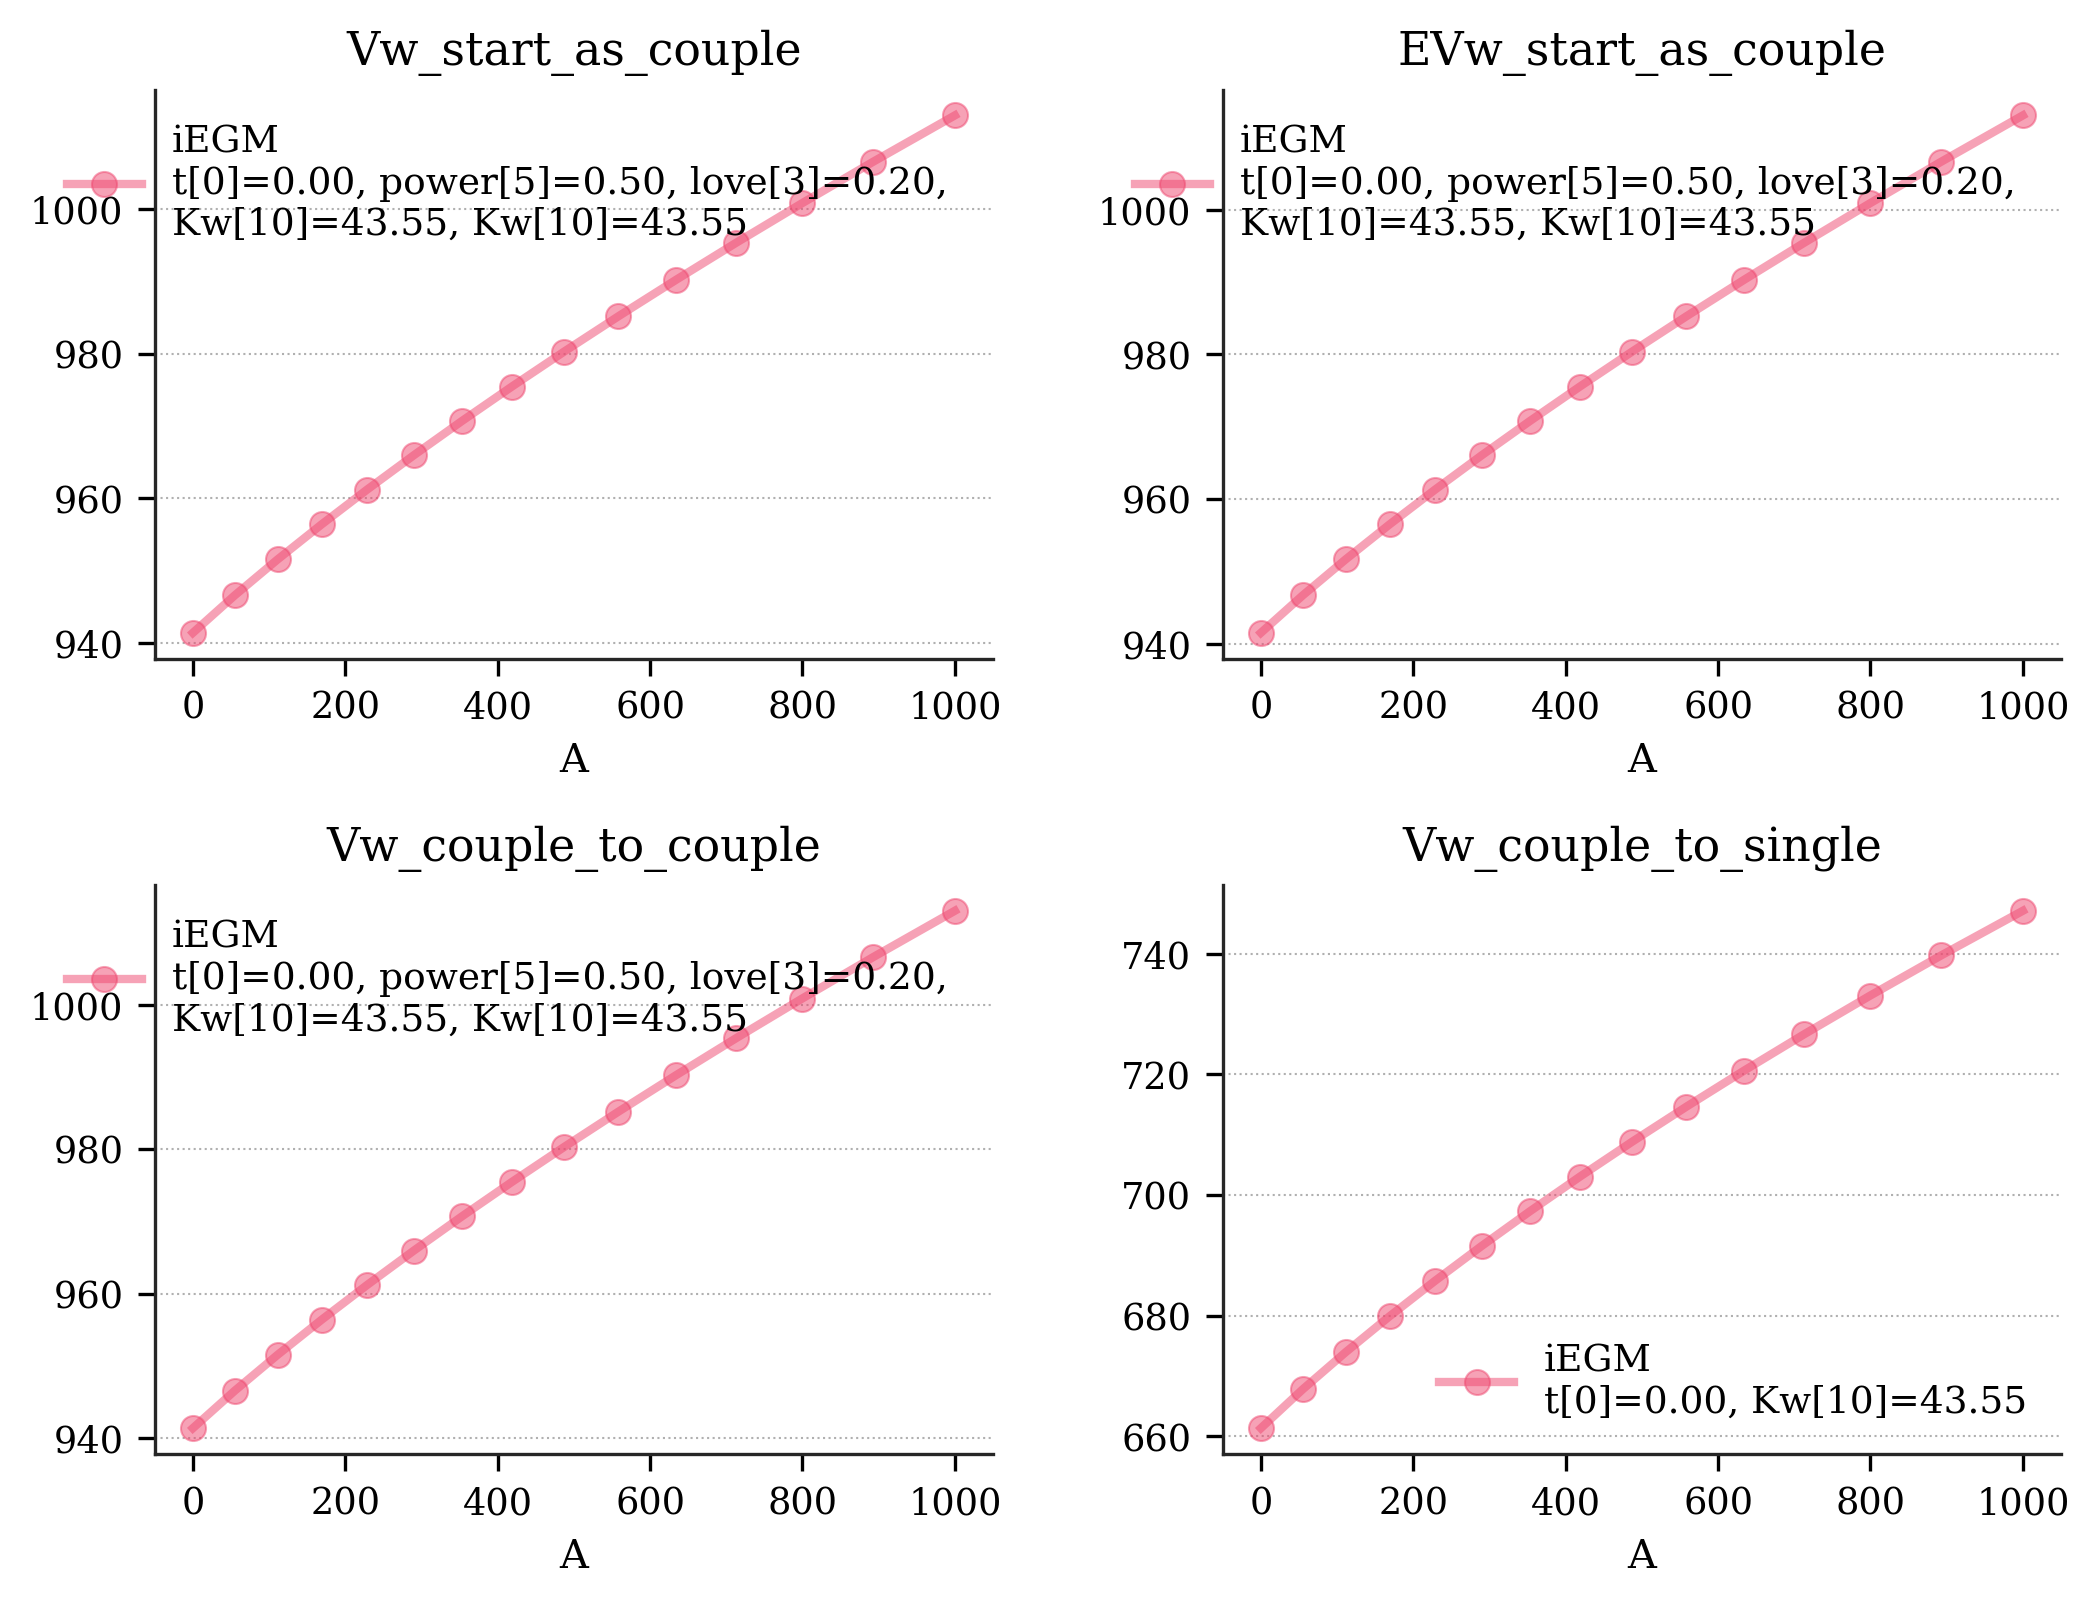

In [16]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_female_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_female_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_female_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_female_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="female_couple_values")
else: fig.tight_layout()


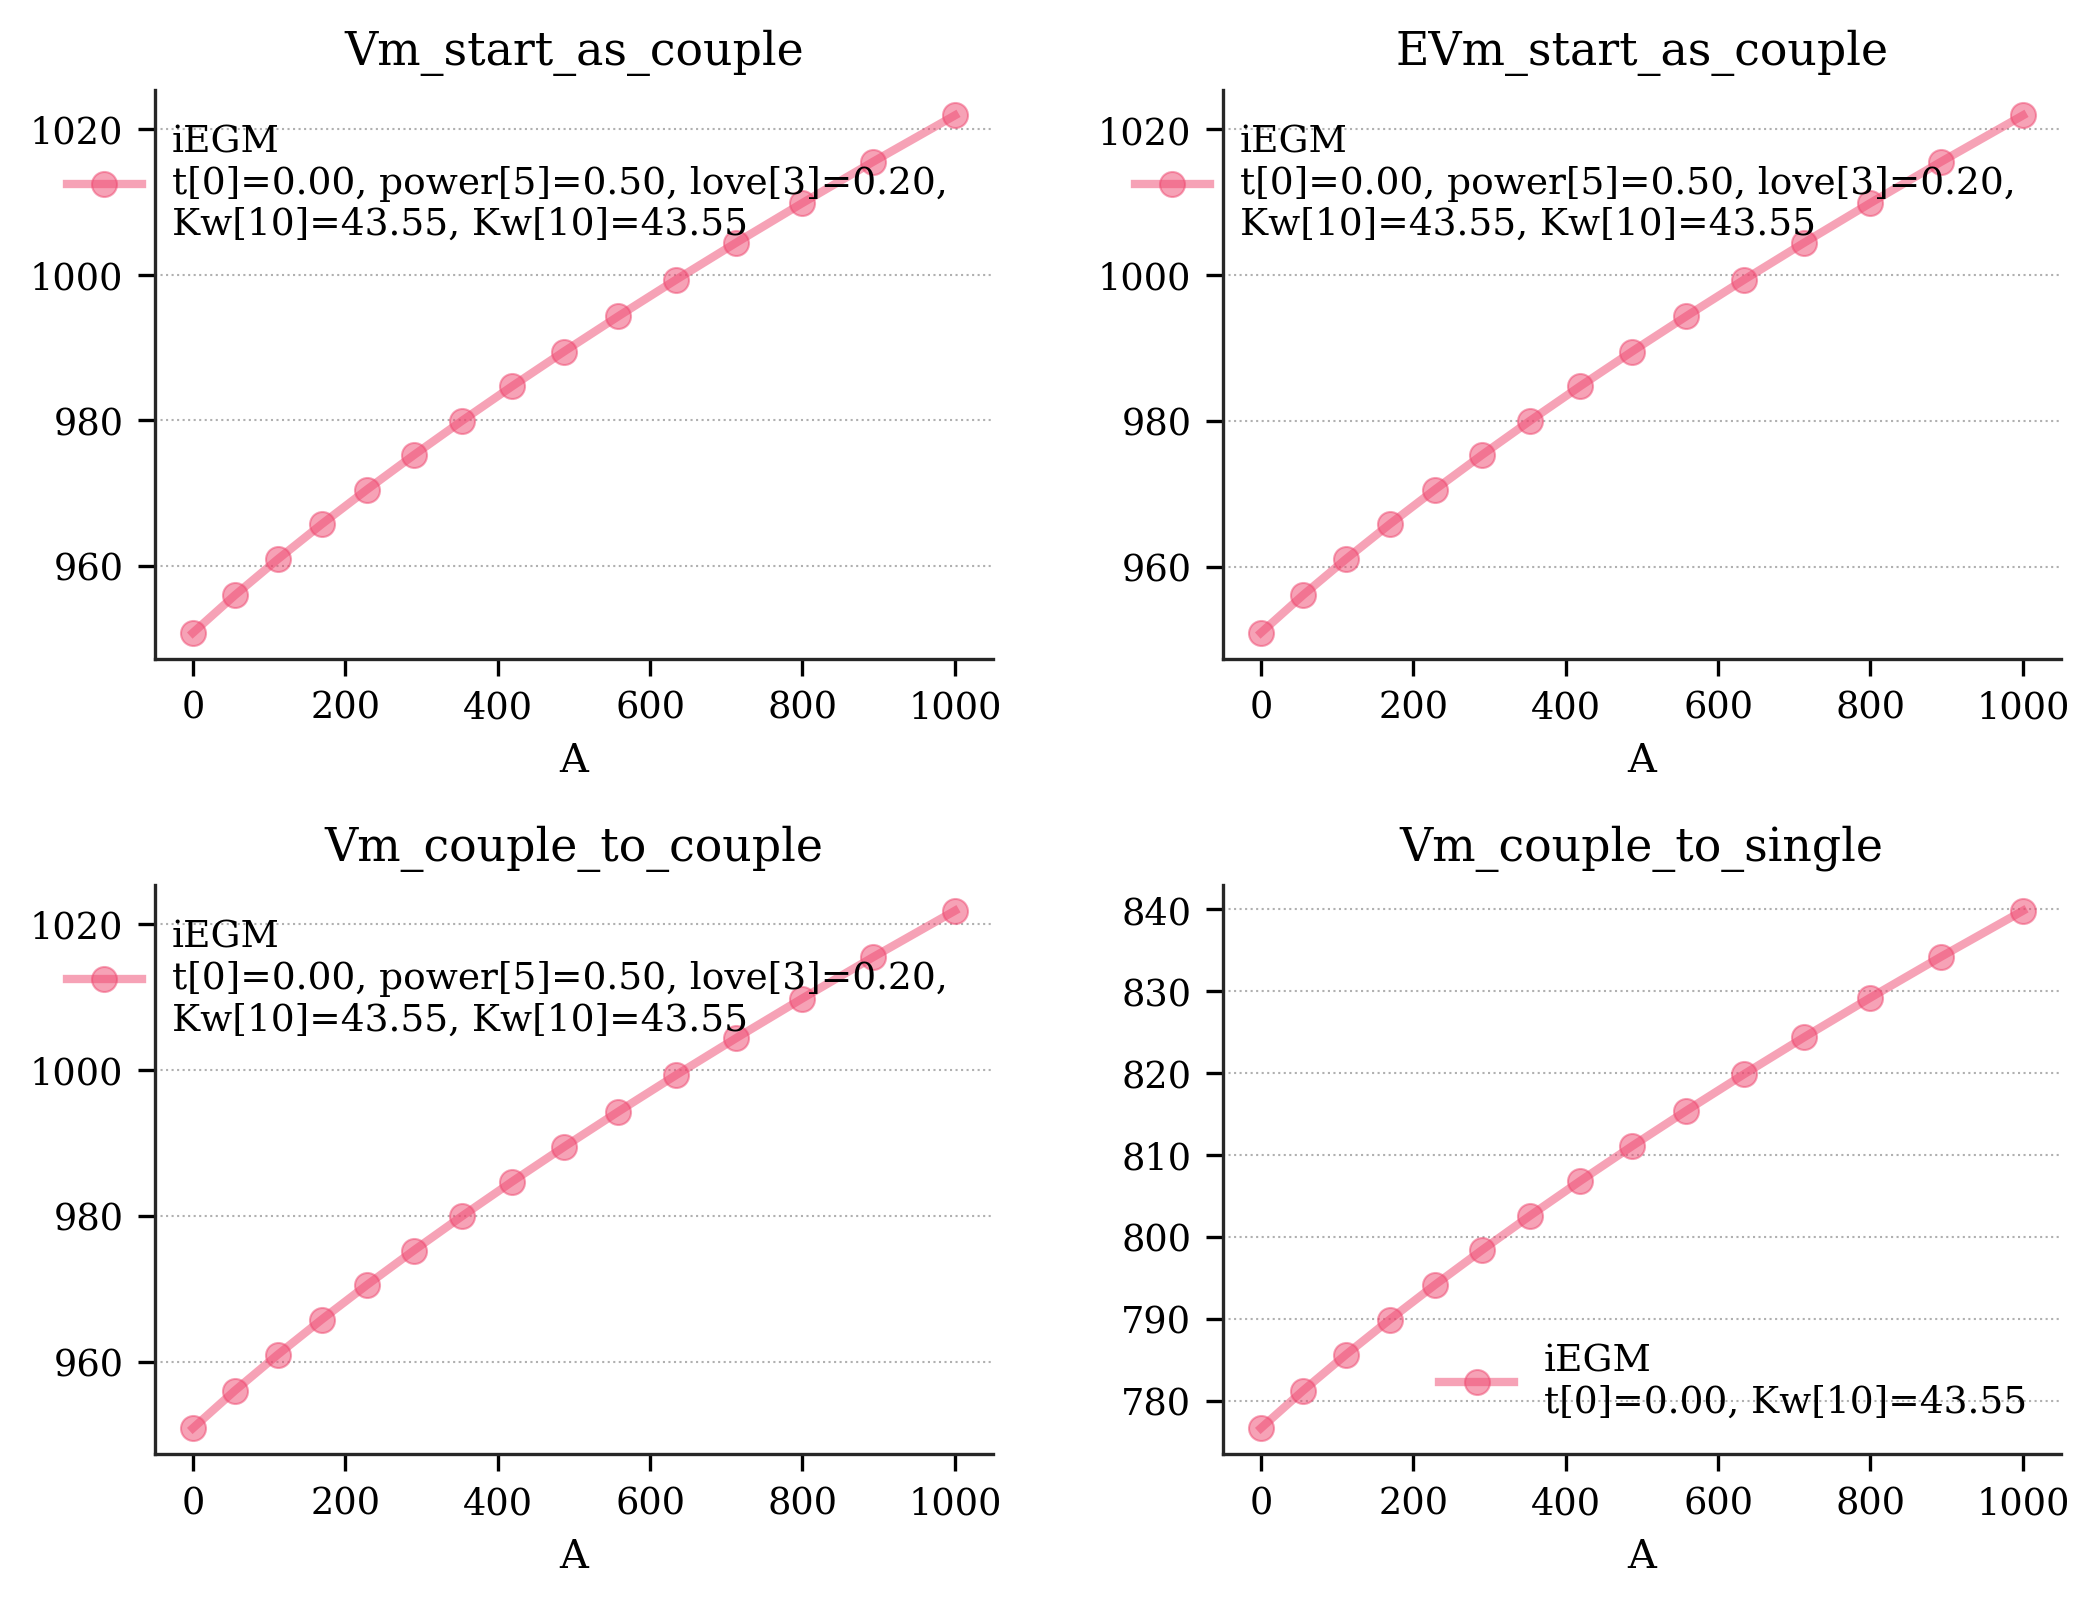

In [17]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_male_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_male_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_male_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_male_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="male_couple_values")
else: fig.tight_layout()


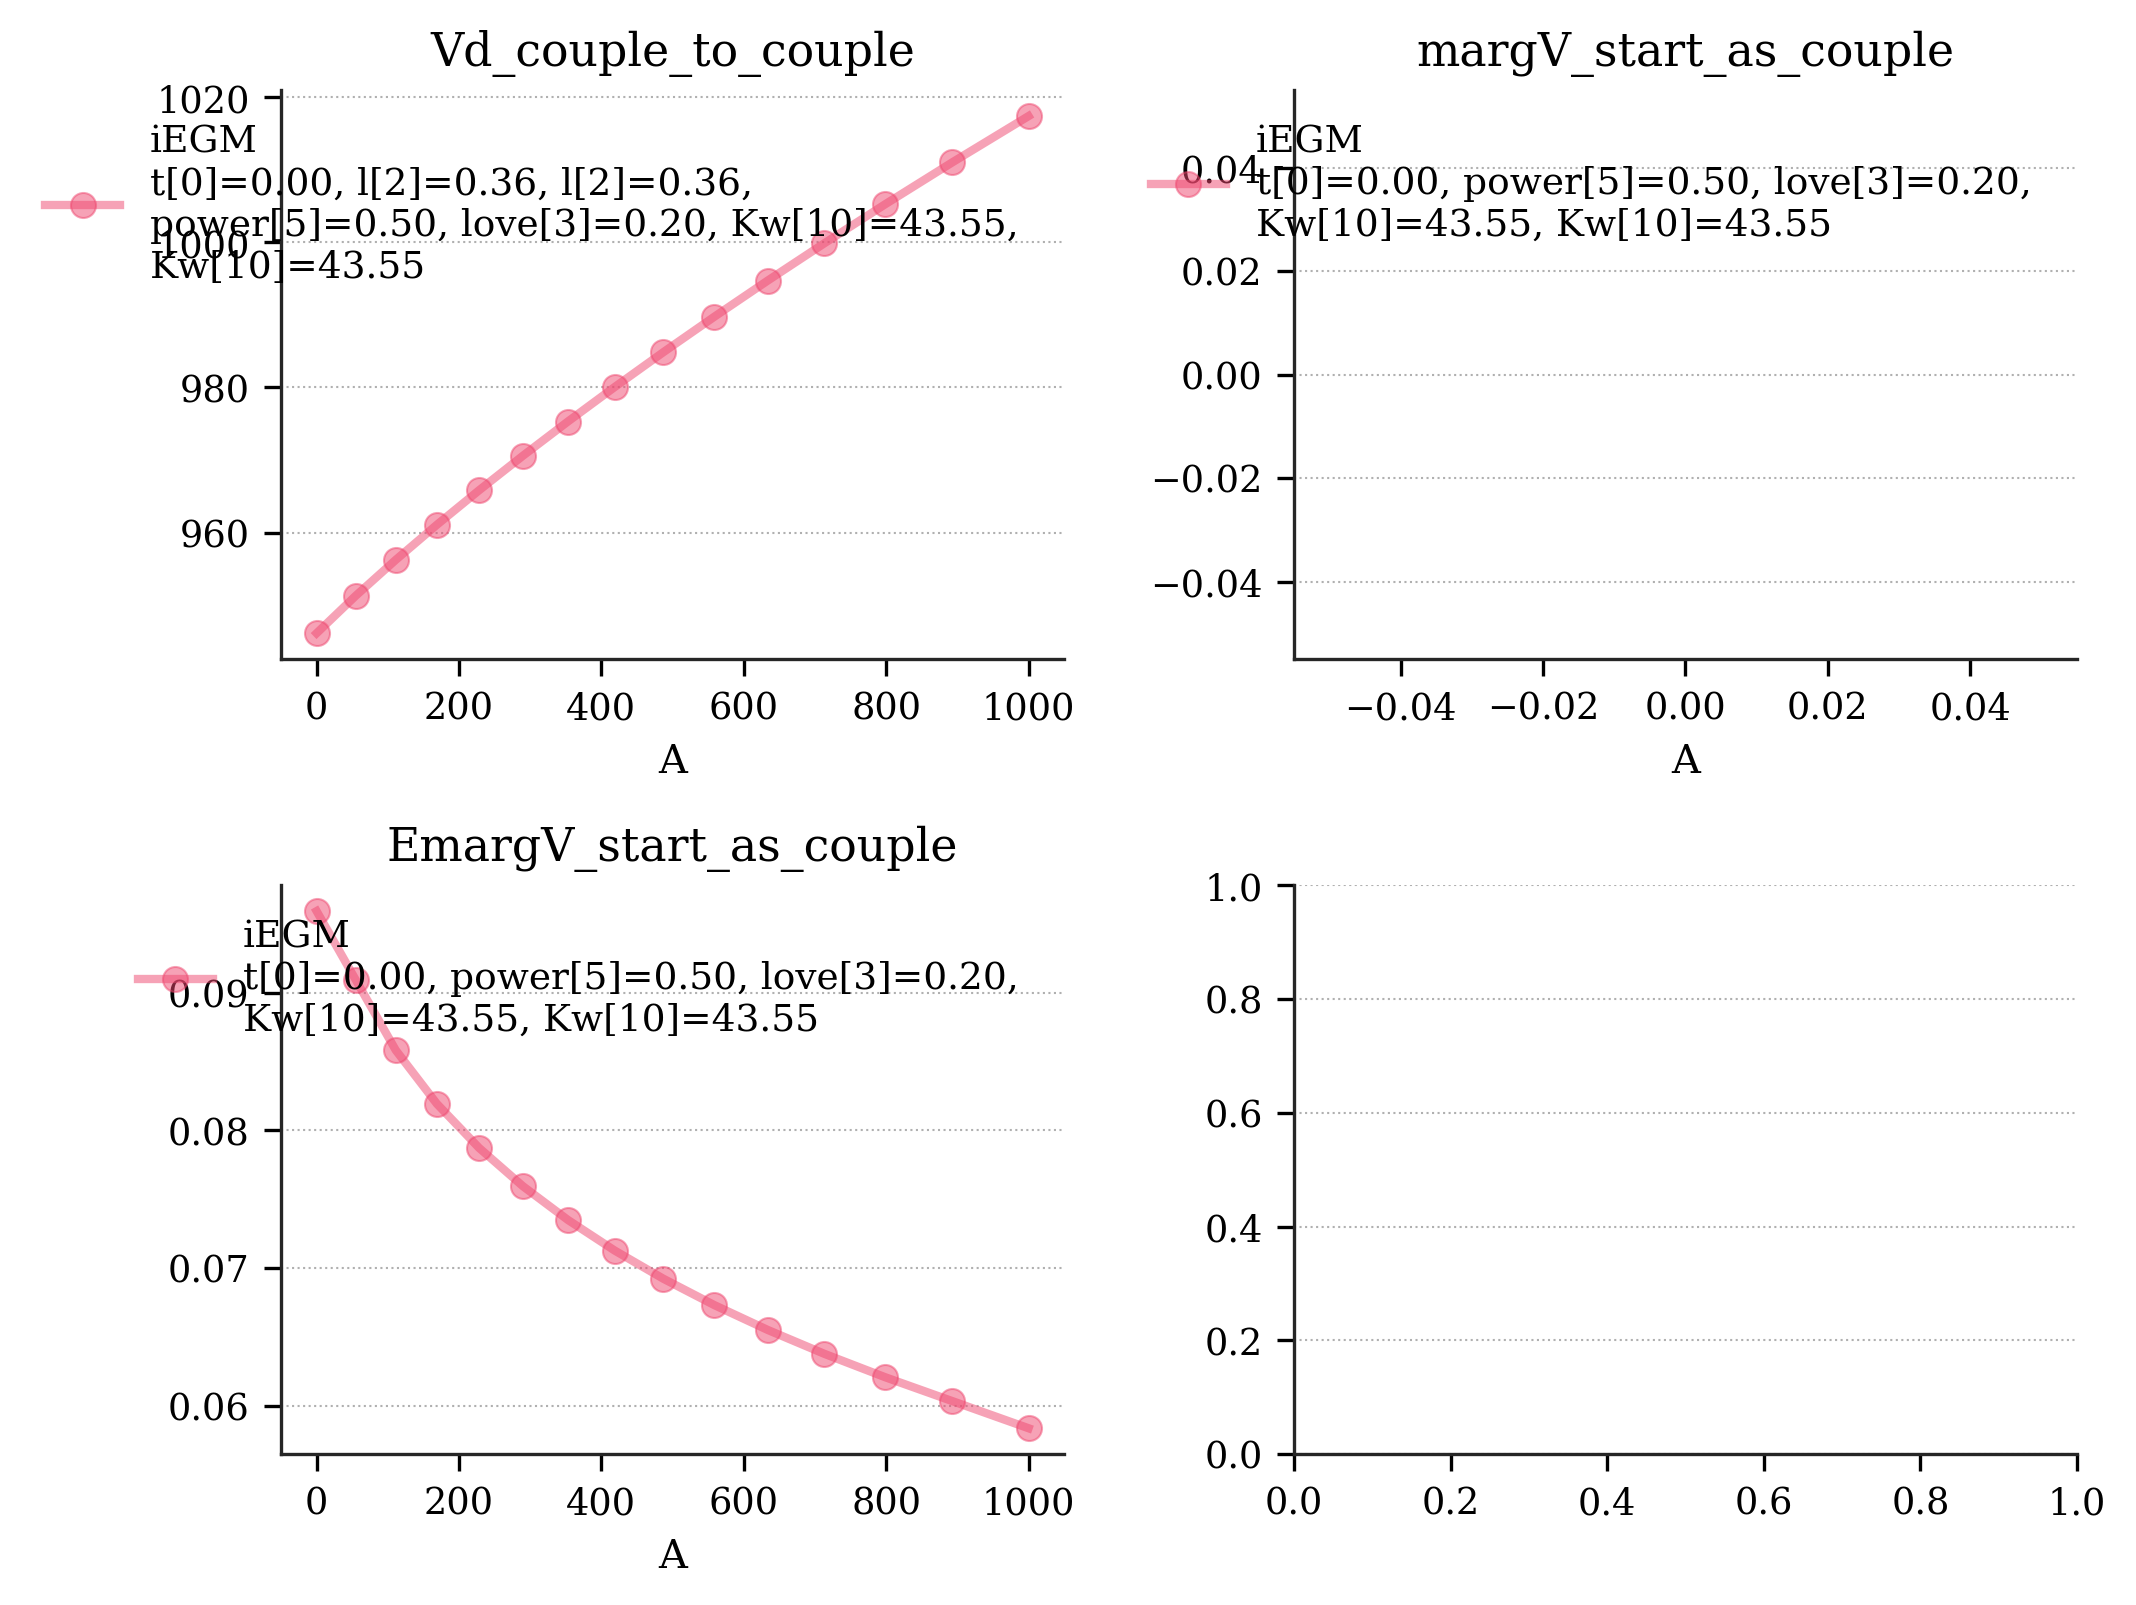

In [18]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_total_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_total_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_total_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_total_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="total_couple_values")
else: fig.tight_layout()


## Simulation

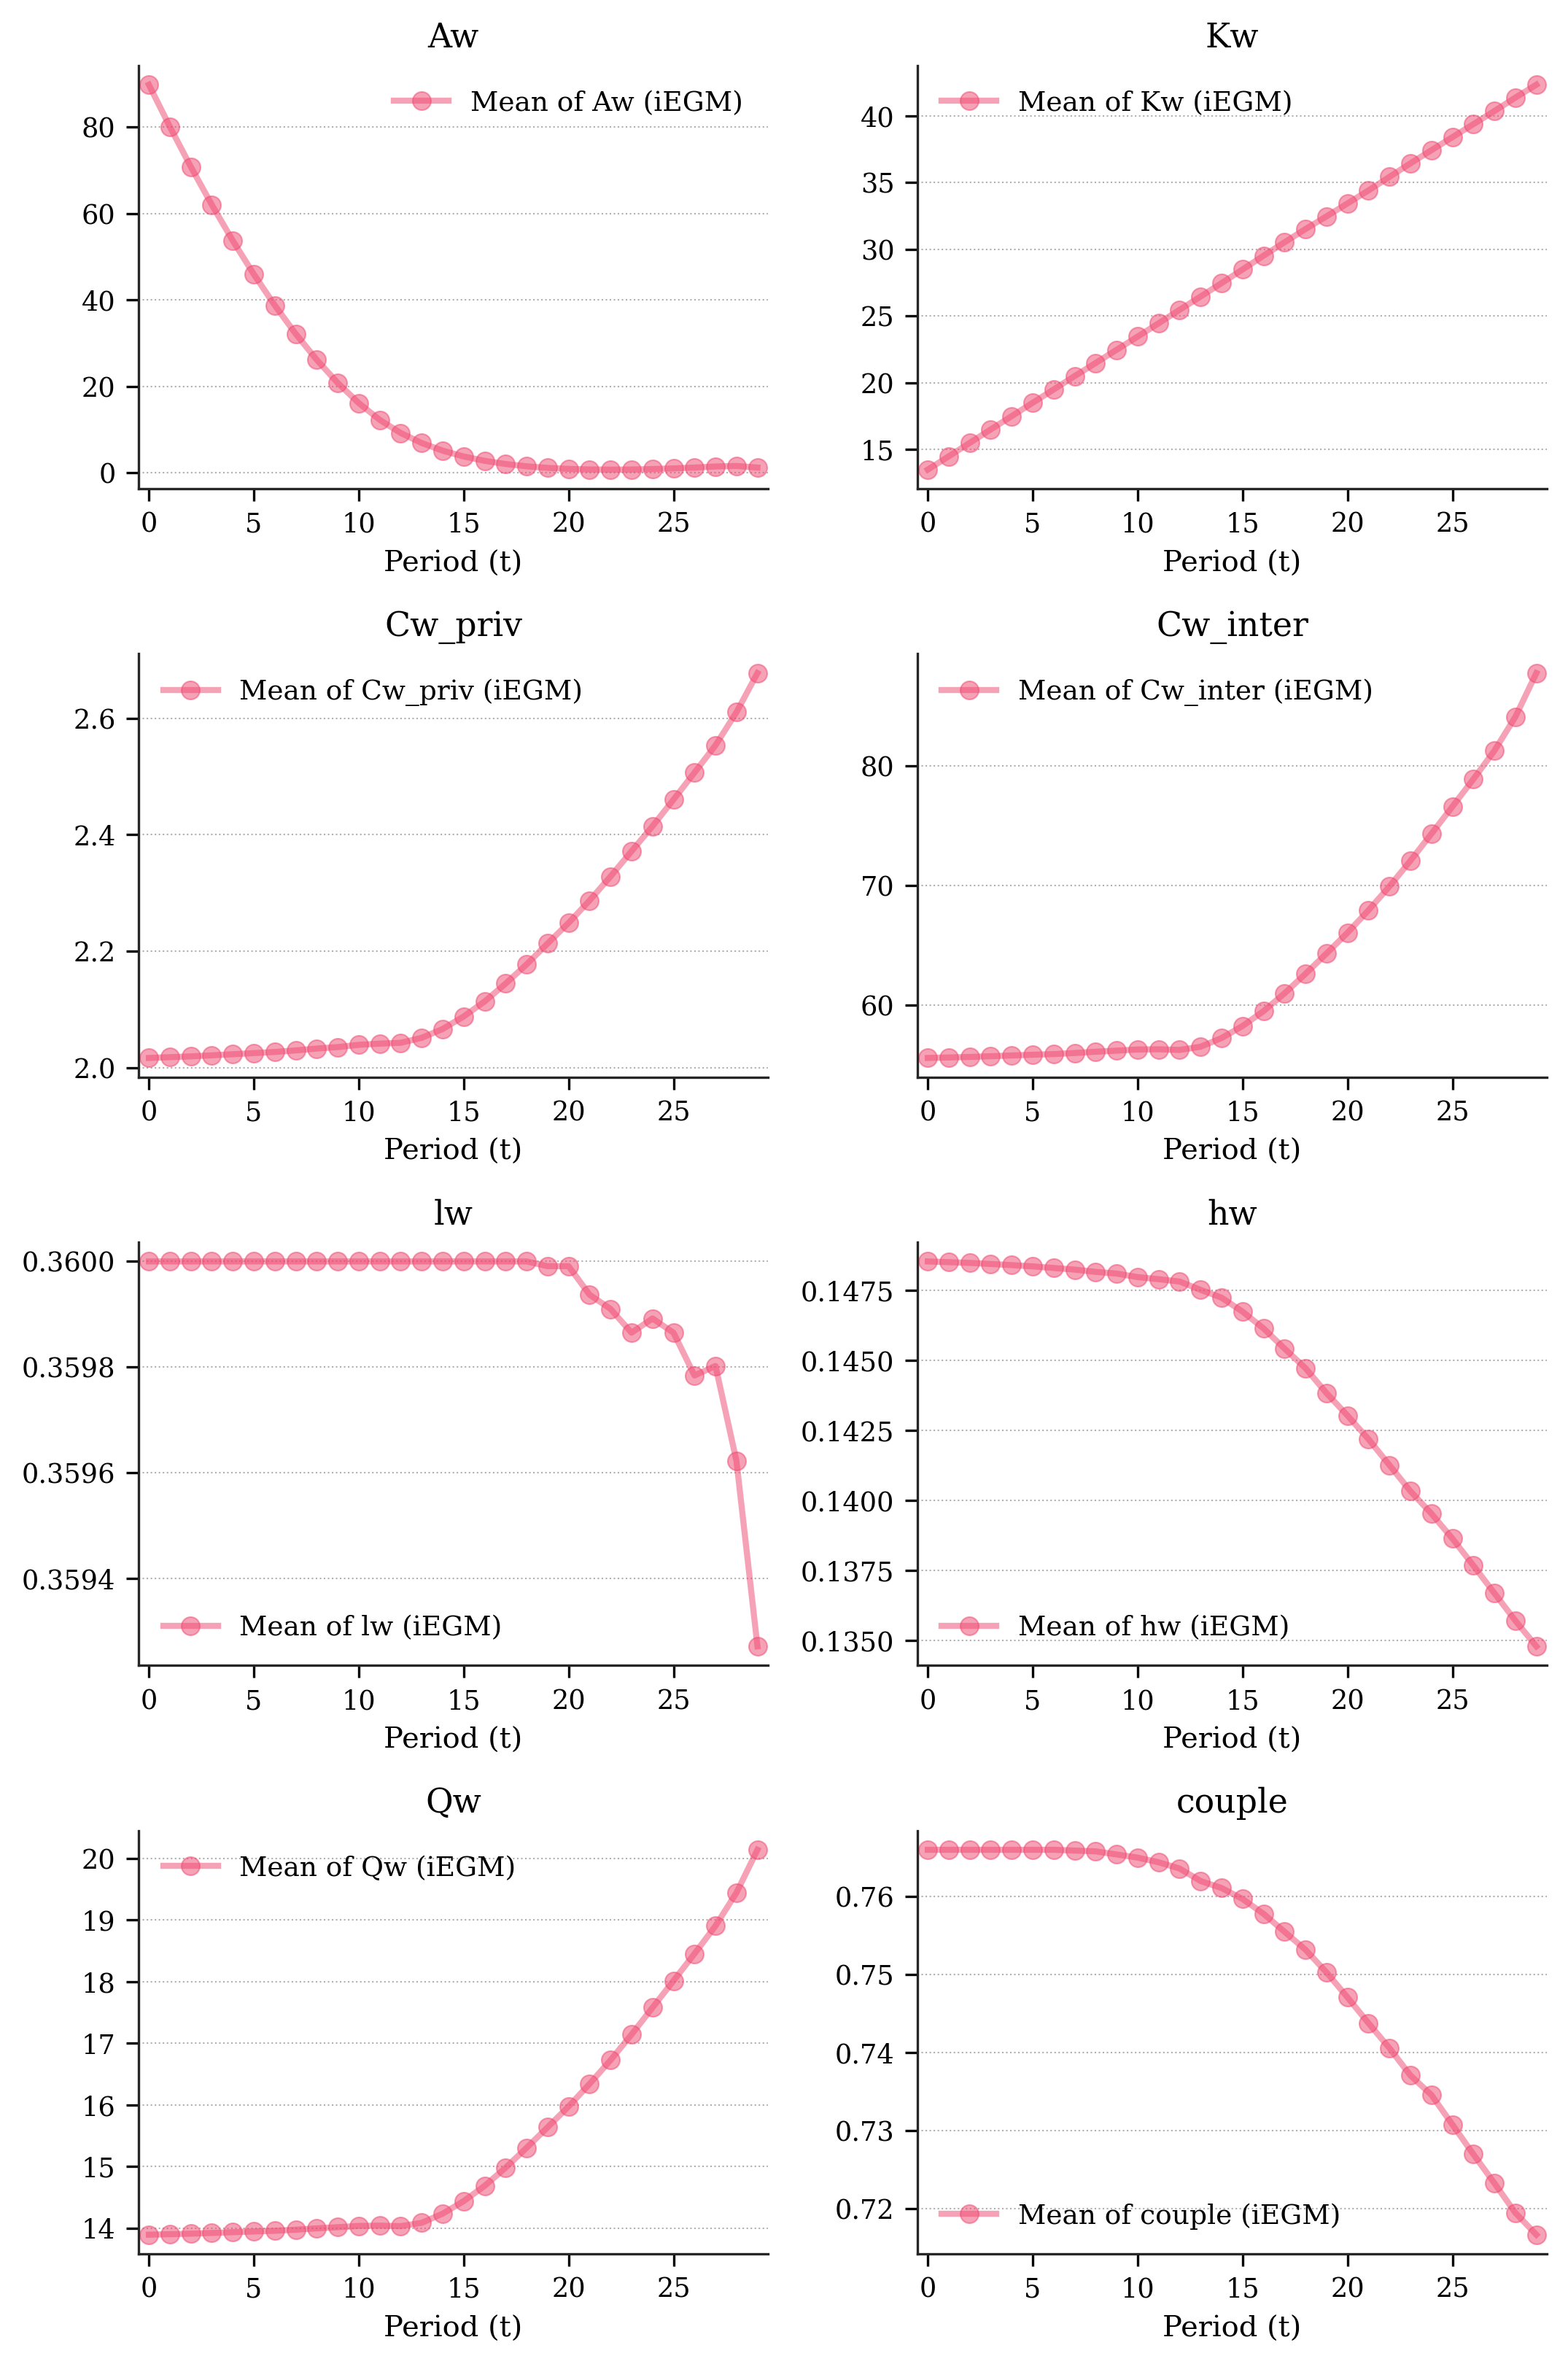

In [19]:
fig, ax = fm.create_figure(4,2,8)
if show_iEGM:    mp_iEGM.plot_sim_female(ax, alpha=0.5)
if show_VFI:     mp_VFI.plot_sim_female(ax, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_sim_female(ax, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_sim_female(ax, alpha=0.5)
if save_figures: fm.save_figure(filename="sim_female_all")
else: fig.tight_layout()

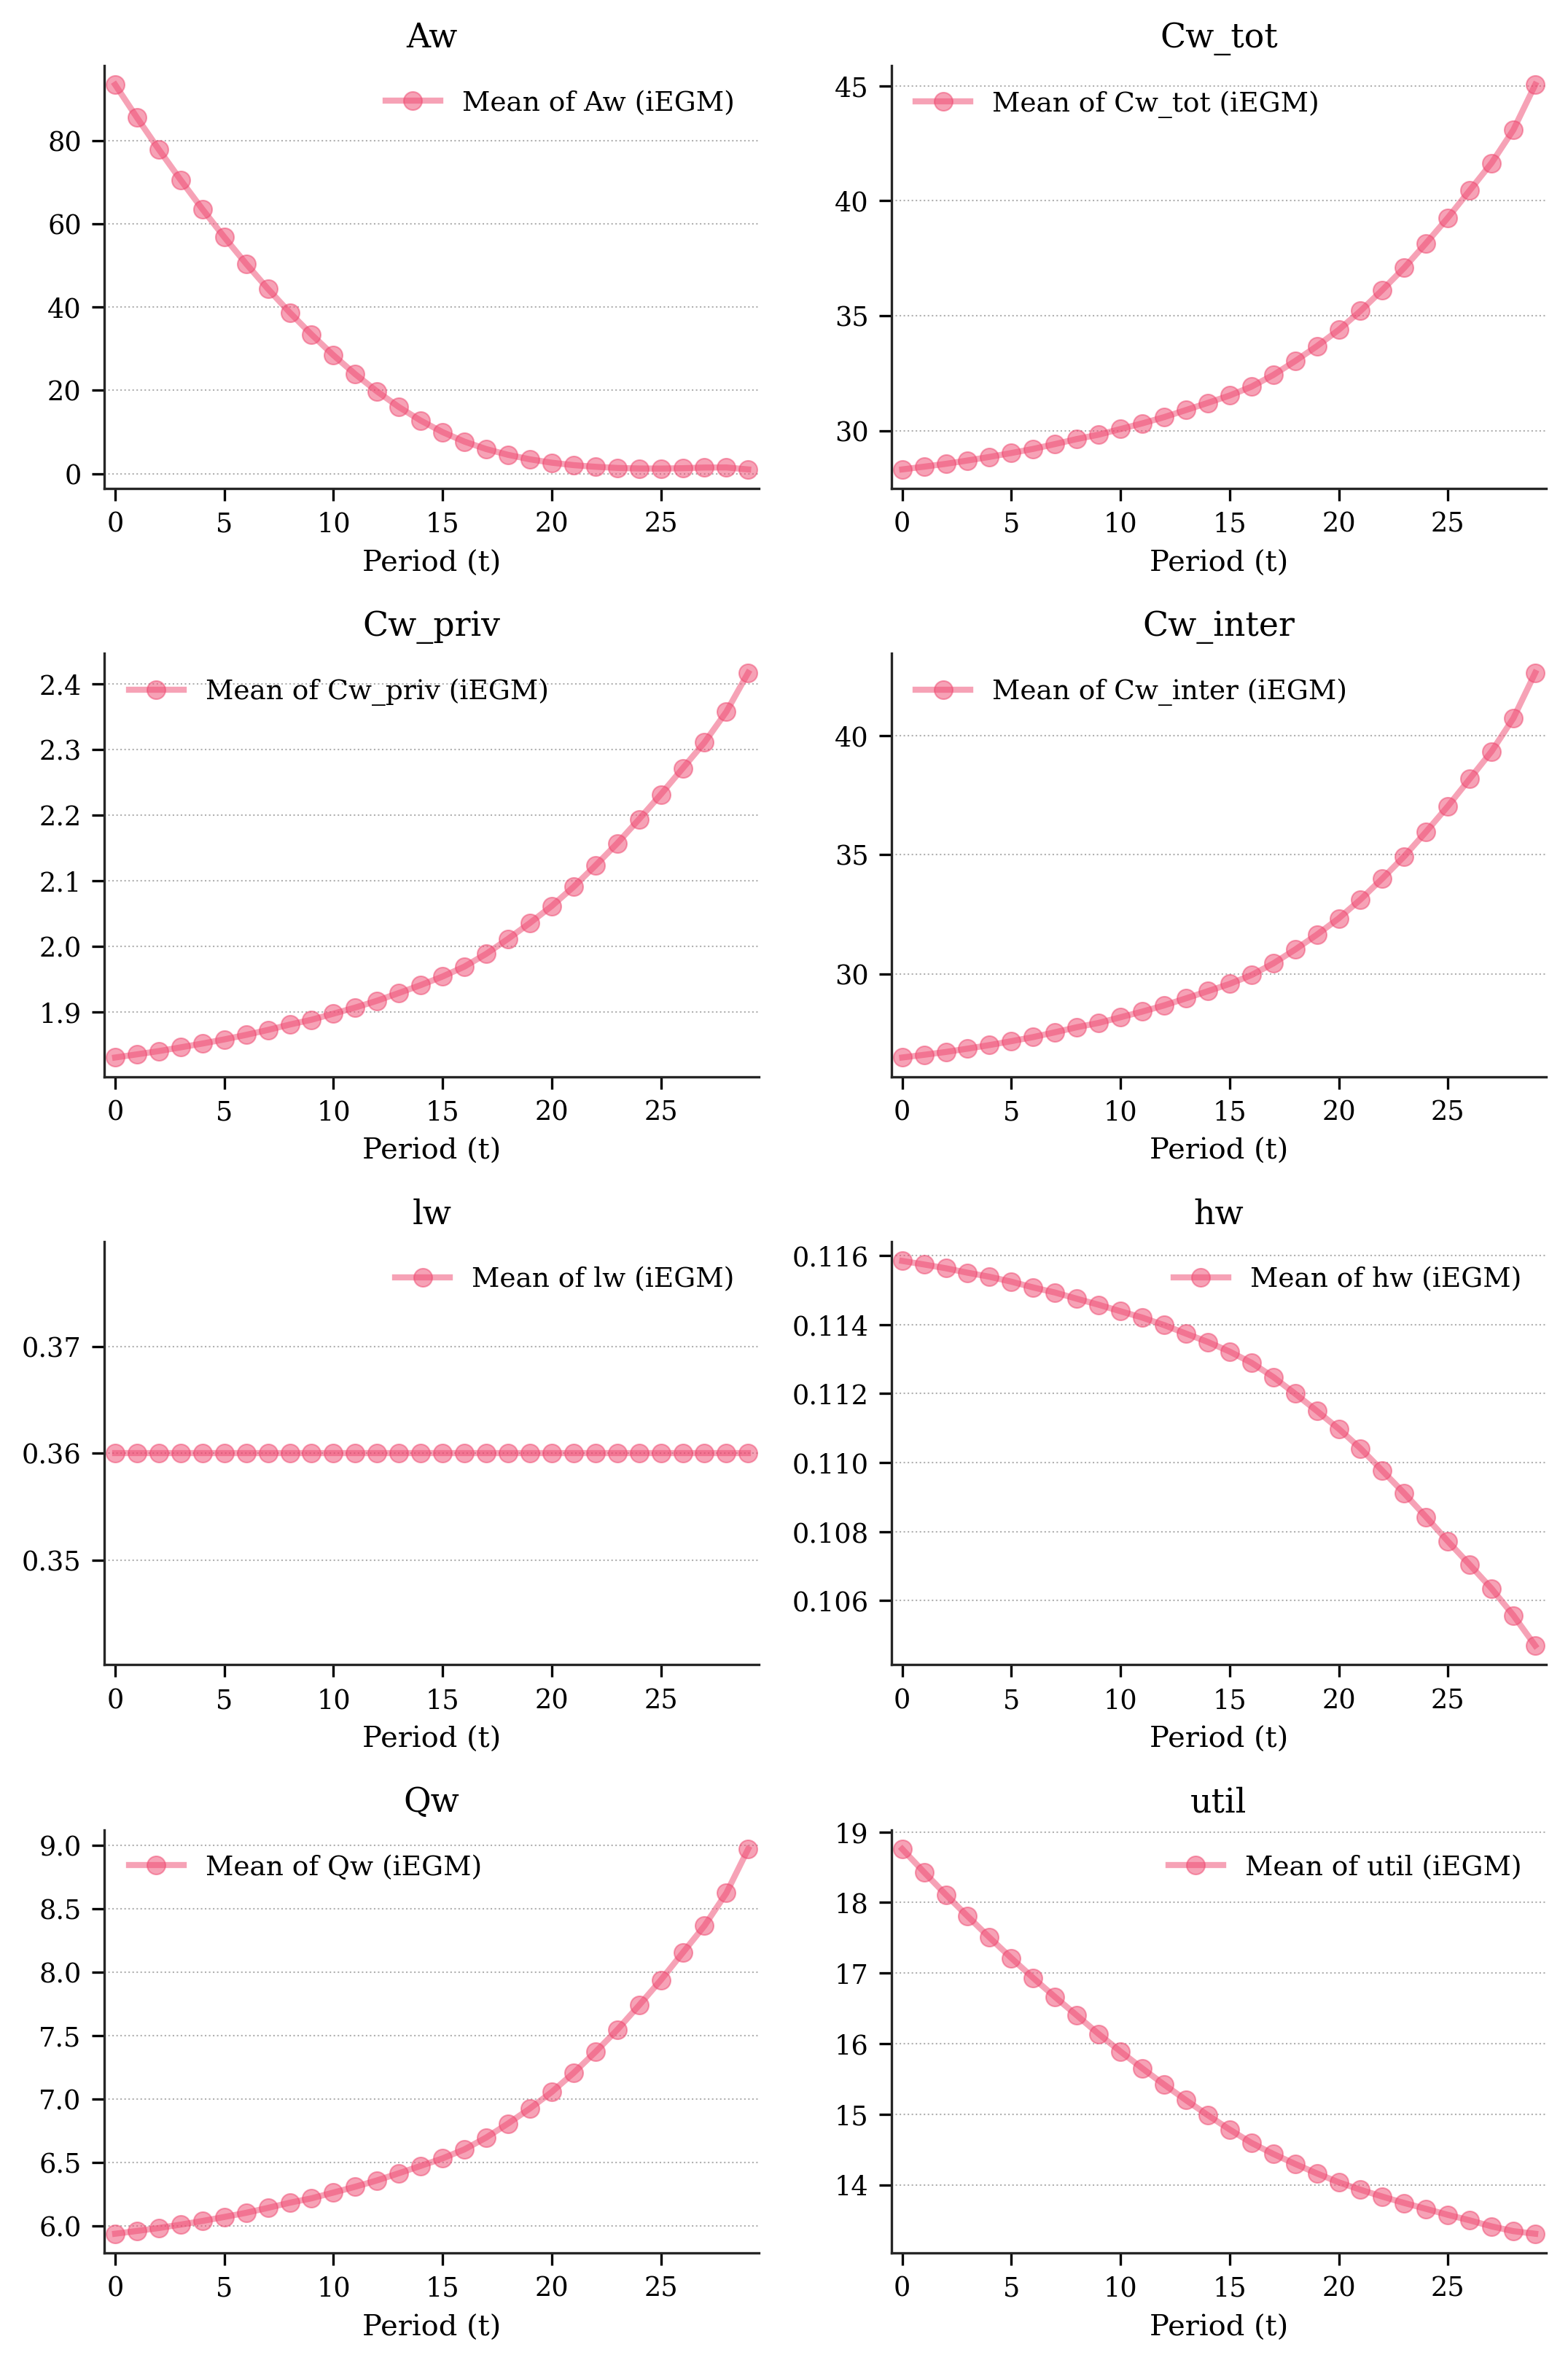

In [20]:
fig, ax = fm.create_figure(4,2,8)
if show_iEGM:    mp_iEGM.plot_sim_female_single(ax, alpha=0.5)
if show_VFI:     mp_VFI.plot_sim_female_single(ax, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_sim_female_single(ax, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_sim_female_single(ax, alpha=0.5)
if save_figures: fm.save_figure(filename="sim_female_single")
else: fig.tight_layout()

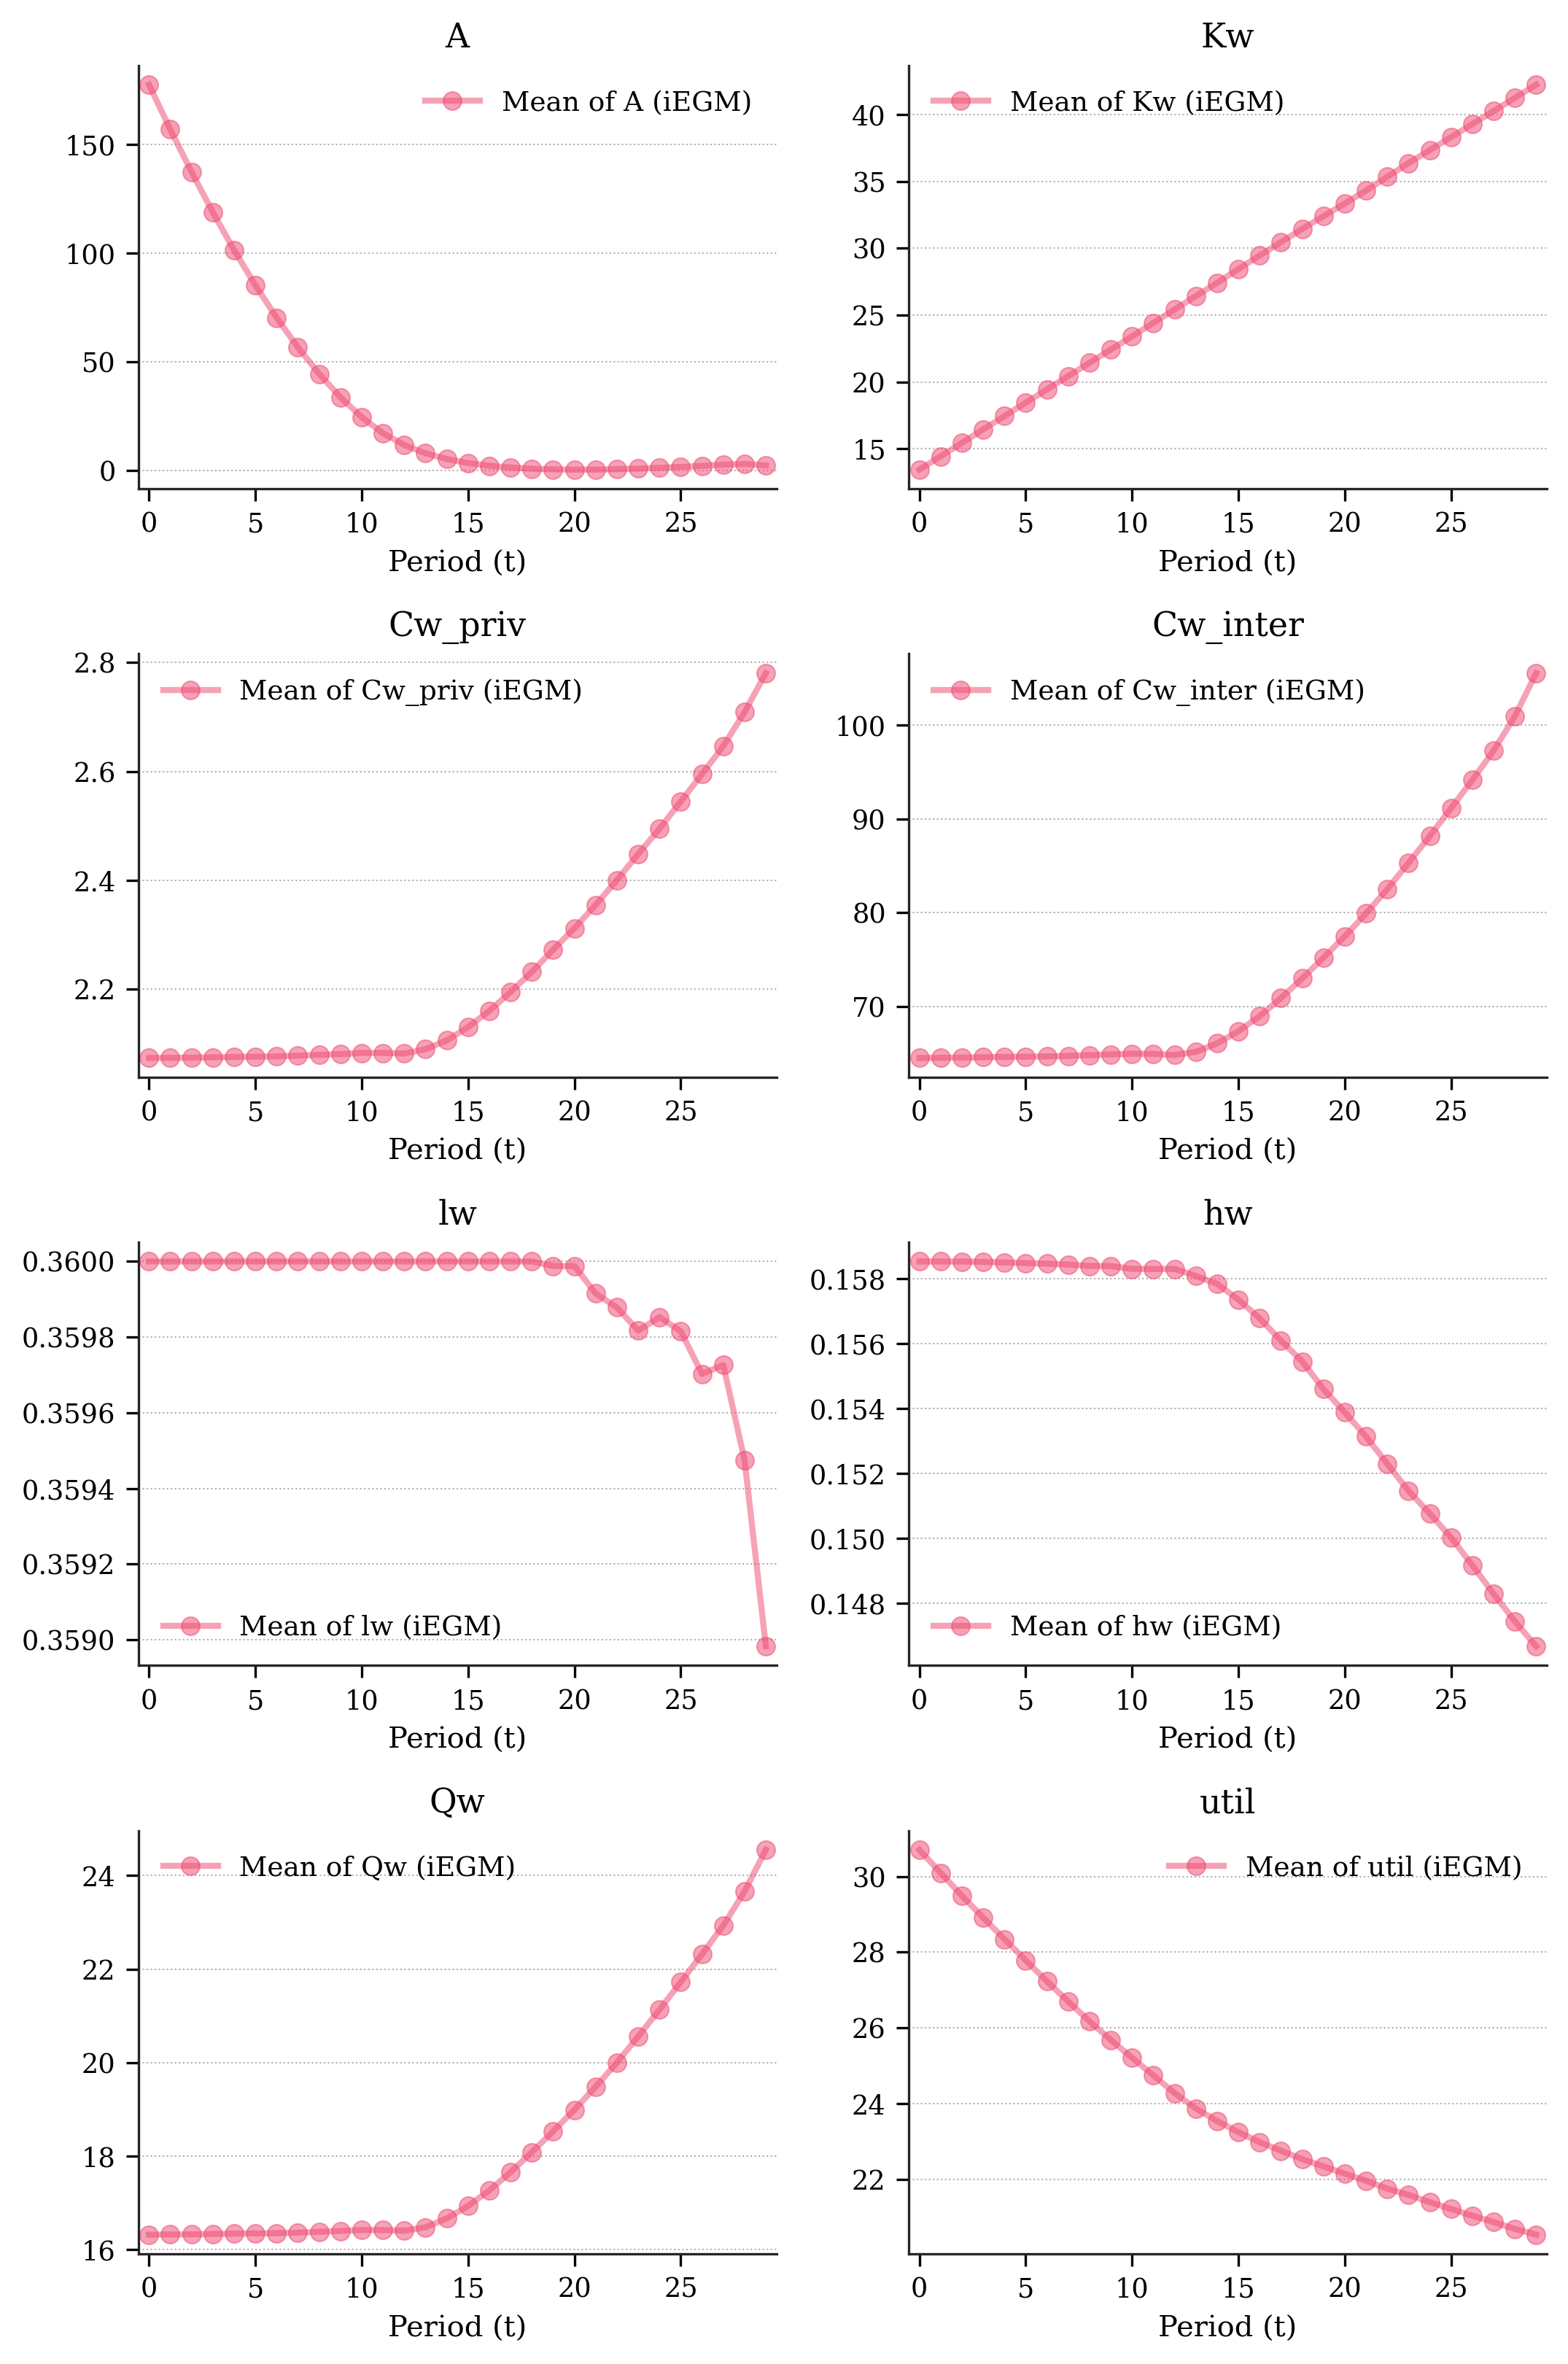

In [21]:
fig, ax = fm.create_figure(4,2,8)
if show_iEGM:    mp_iEGM.plot_sim_female_couple(ax, alpha=0.5)
if show_VFI:     mp_VFI.plot_sim_female_couple(ax, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_sim_female_couple(ax, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_sim_female_couple(ax, alpha=0.5)
if save_figures: fm.save_figure(filename="sim_female_couple")
else: fig.tight_layout()

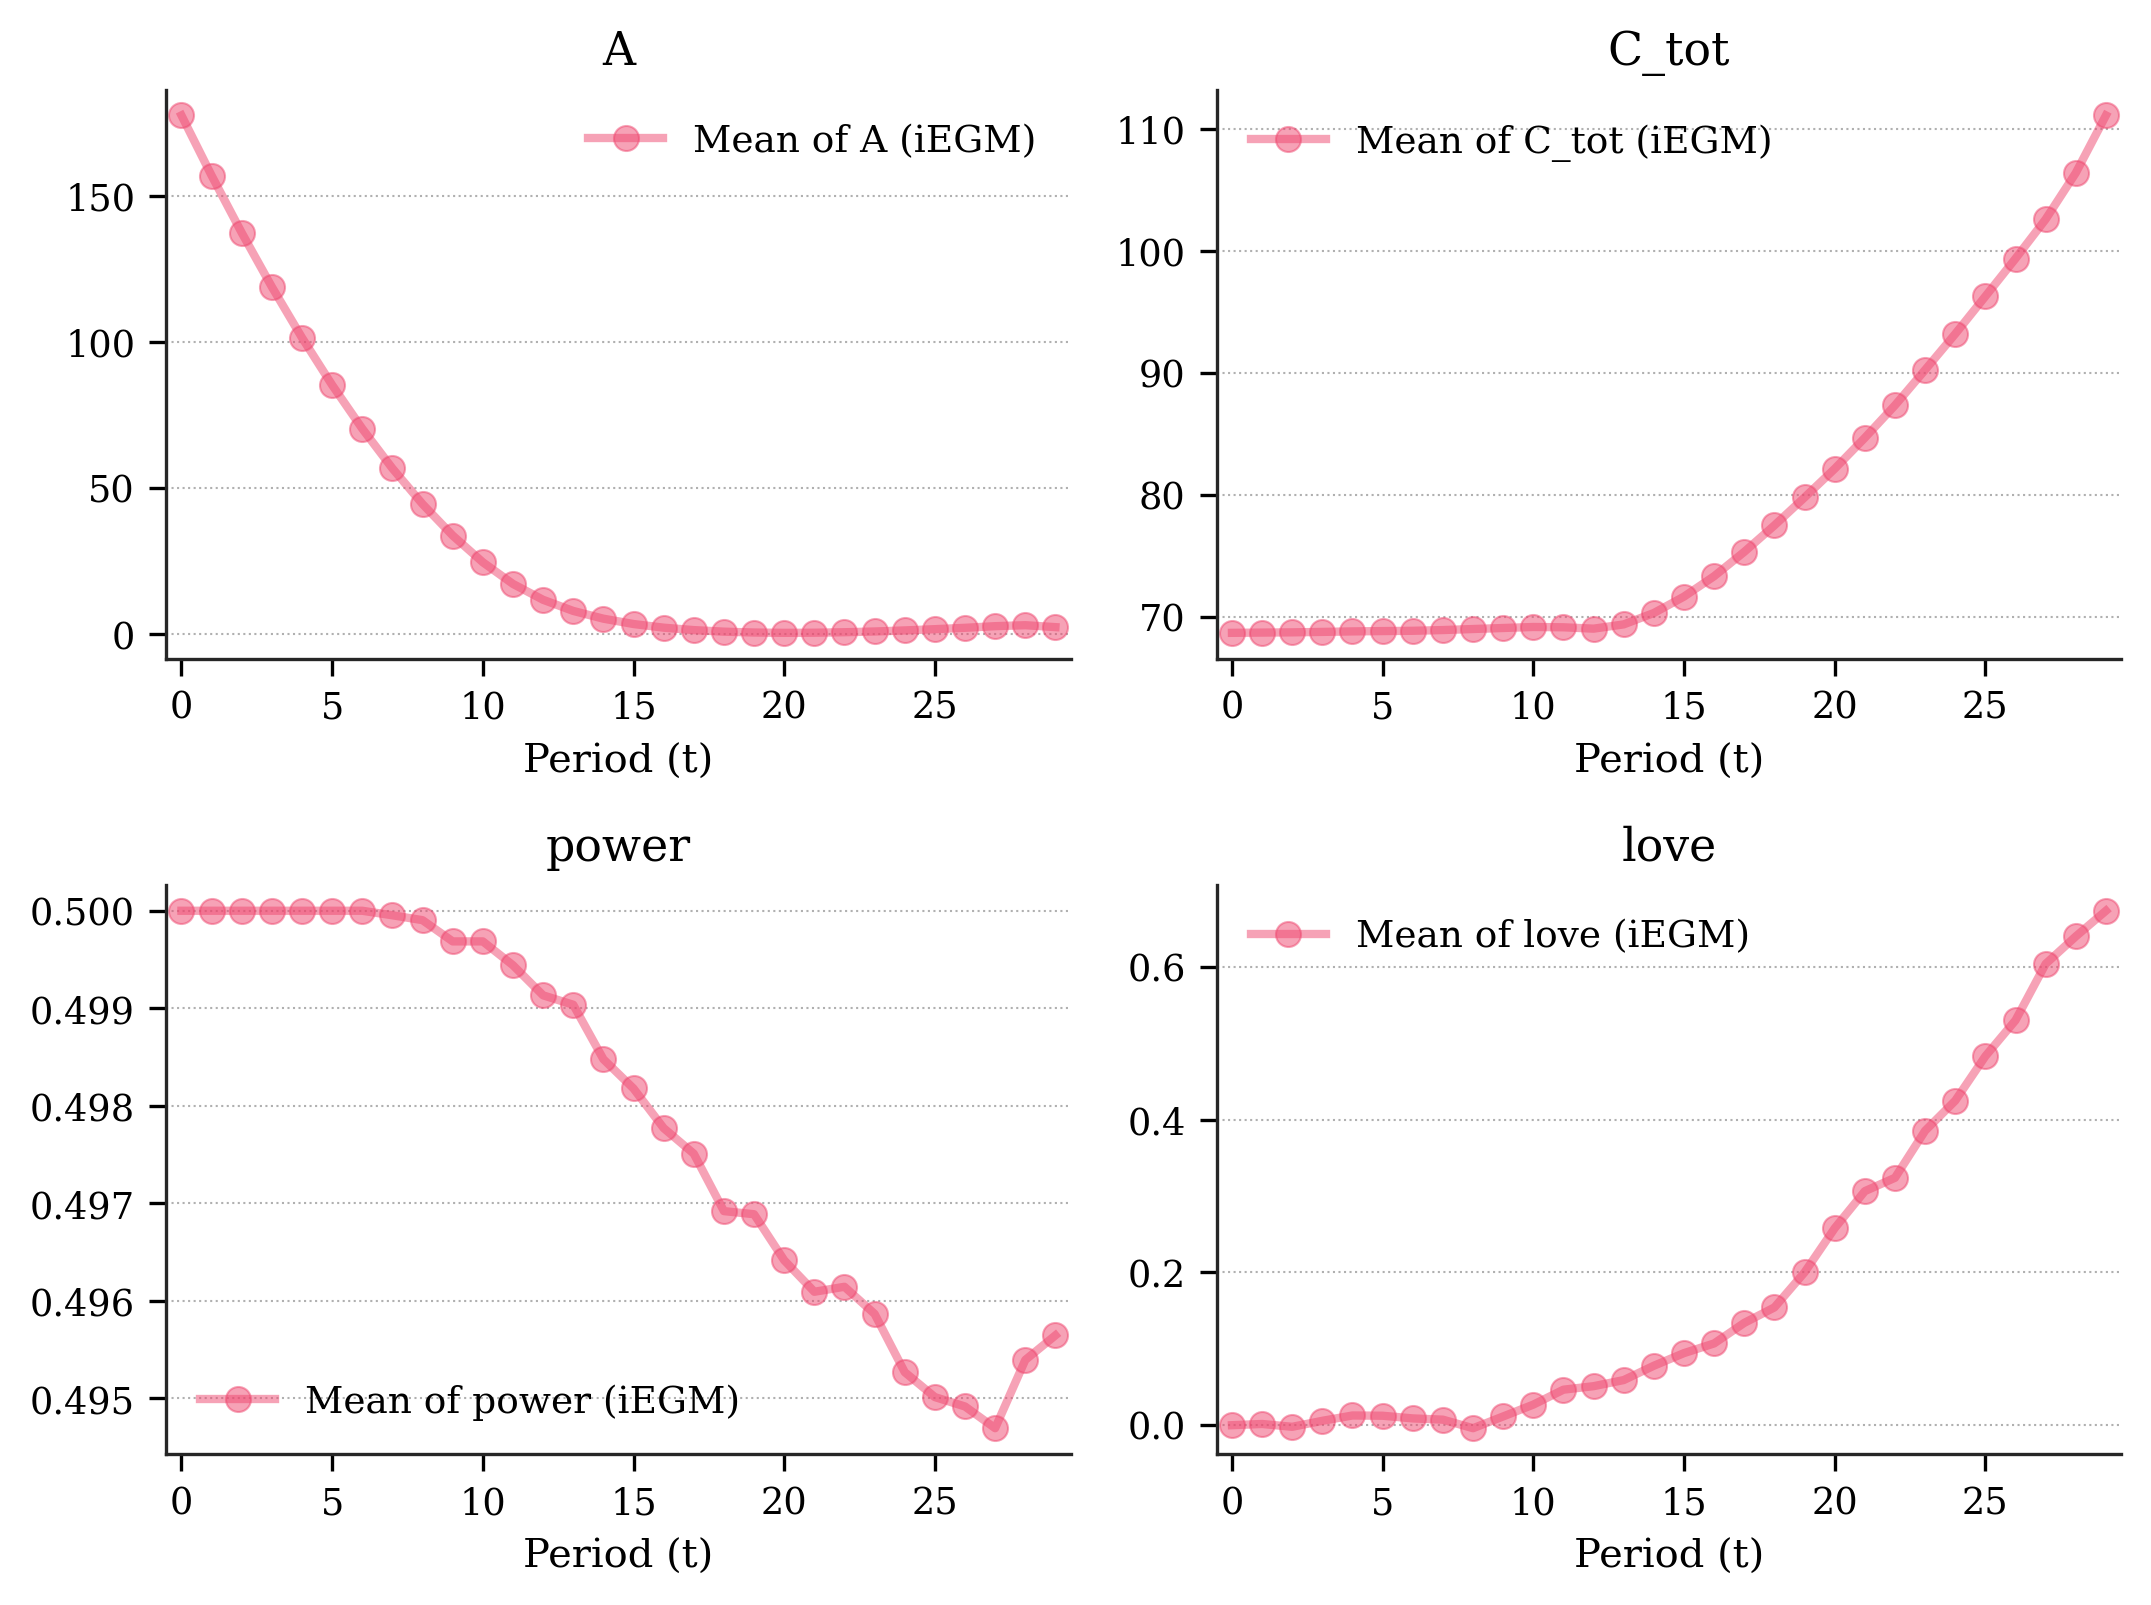

In [22]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_sim_couple(ax, alpha=0.5)
if show_VFI:     mp_VFI.plot_sim_couple(ax, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_sim_couple(ax, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_sim_couple(ax, alpha=0.5)
if save_figures: fm.save_figure(filename="sim_couple")
else: fig.tight_layout()

In [23]:
model_iEGM.par.grid_l

array([0.  , 0.27, 0.36])

In [24]:
model_iEGM.sim.Aw[:,28].argmax()

8476

In [25]:
print('Aw: ',model_iEGM.sim.Aw[[9811],:])
print('Cw_priv: ', model_iEGM.sim.Cw_priv[[9811],:])
print('Cm_priv: ', model_iEGM.sim.Cm_priv[[9811],:])
print('Cw_inter: ', model_iEGM.sim.Cw_inter[[9811],:])
print('wage_w: ', model_iEGM.sim.wage_w[[9811],:])
print('wage_m: ', model_iEGM.sim.wage_m[[9811],:])
print('Kw: ', model_iEGM.sim.Kw[[9811],:])
print('Km: ', model_iEGM.sim.Km[[9811],:])
print('lw: ', model_iEGM.sim.lw[[9811],:])
print('lm: ', model_iEGM.sim.lm[[9811],:])
print('shock_Kw: ', model_iEGM.sim.draw_shock_Kw[[9811],:])
print('shock_Km: ', model_iEGM.sim.draw_shock_Km[[9811],:])
print('couple: ', model_iEGM.sim.couple[[9811],:])

# model_iEGM.sim.couple[[9811],:]
# model_iEGM.sim.Am[[9811],:]
# model_iEGM.sim.Kw[[9811],:]
# model_iEGM.sim.wage_w[[9811],:]

# 9698, 5019

Aw:  [[182.49313272 169.18410302 155.62247045 142.59603307 129.54581676
  117.17080043 104.53616443  92.3241239   80.39220236  68.52763133
   57.25242181  47.06065213  38.19268899  30.21842675  21.26406093
   14.6082684   12.06718583  12.96693075  12.29395854  17.26081624
   26.89413037  46.59374538  91.88018907 120.12147292 151.40117452
  181.71264634 183.08076332 151.83294381  99.09994133  22.97209077]]
Cw_priv:  [[2.3745421  2.35664615 2.4705529  2.45104286 2.54167205 2.50967987
  2.65592789 2.69718343 2.74240268 2.87625974 2.88462141 2.83801996
  2.76195589 2.72806387 3.00821856 3.08430989 3.30764526 3.42455748
  3.36506393 3.63979697 3.93154867 4.41430215 4.95537051 4.95968335
  4.98760751 5.25442309 5.36439746 5.38961794 5.57066328 6.1800151 ]]
Cm_priv:  [[2.85800876 2.85004499 2.82934126 2.780066   2.8454304  2.70287458
  2.67215295 2.72652605 2.71920051 2.70300582 2.80181434 2.94417683
  2.85193637 2.74409562 2.70368255 2.82378323 2.91322134 2.90531364
  2.98703721 3.10393671 3

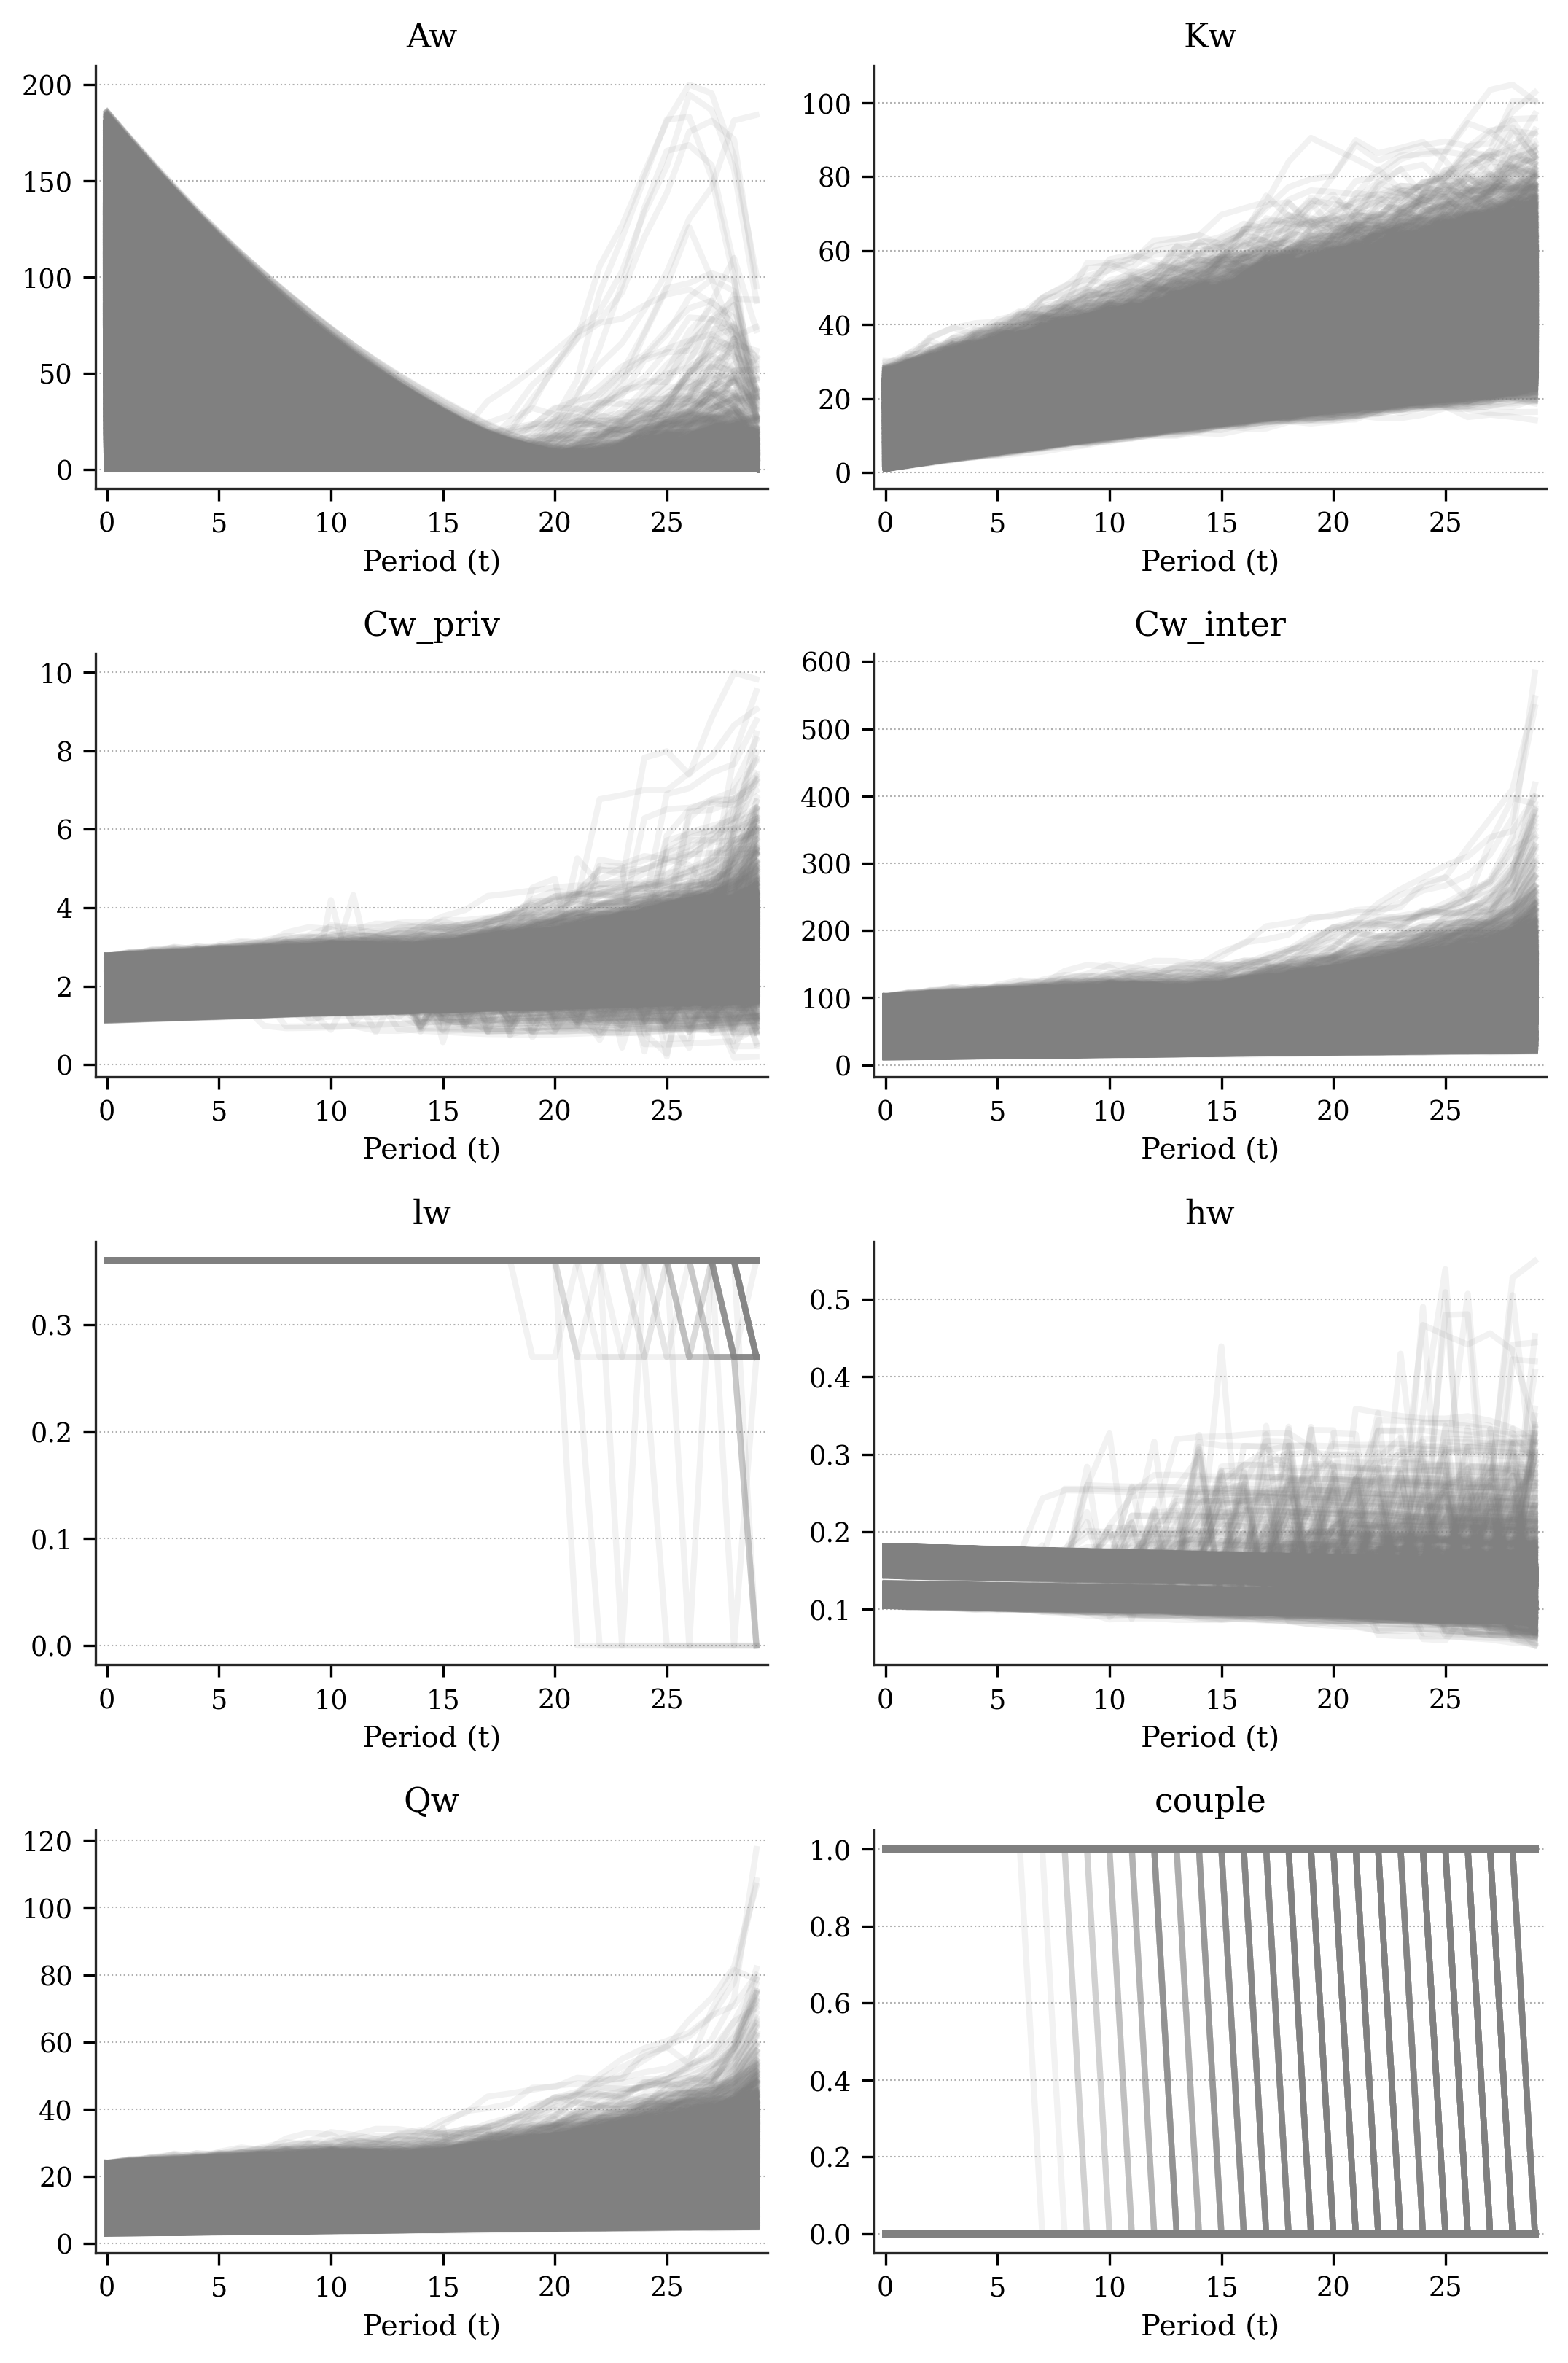

In [26]:
fig, ax = fm.create_figure(4,2,8)
mp_iEGM.plot_sim_female(ax, agg_fct=None ,alpha=0.5)
if save_figures: fm.save_figure(filename="sim_test")
else: fig.tight_layout()

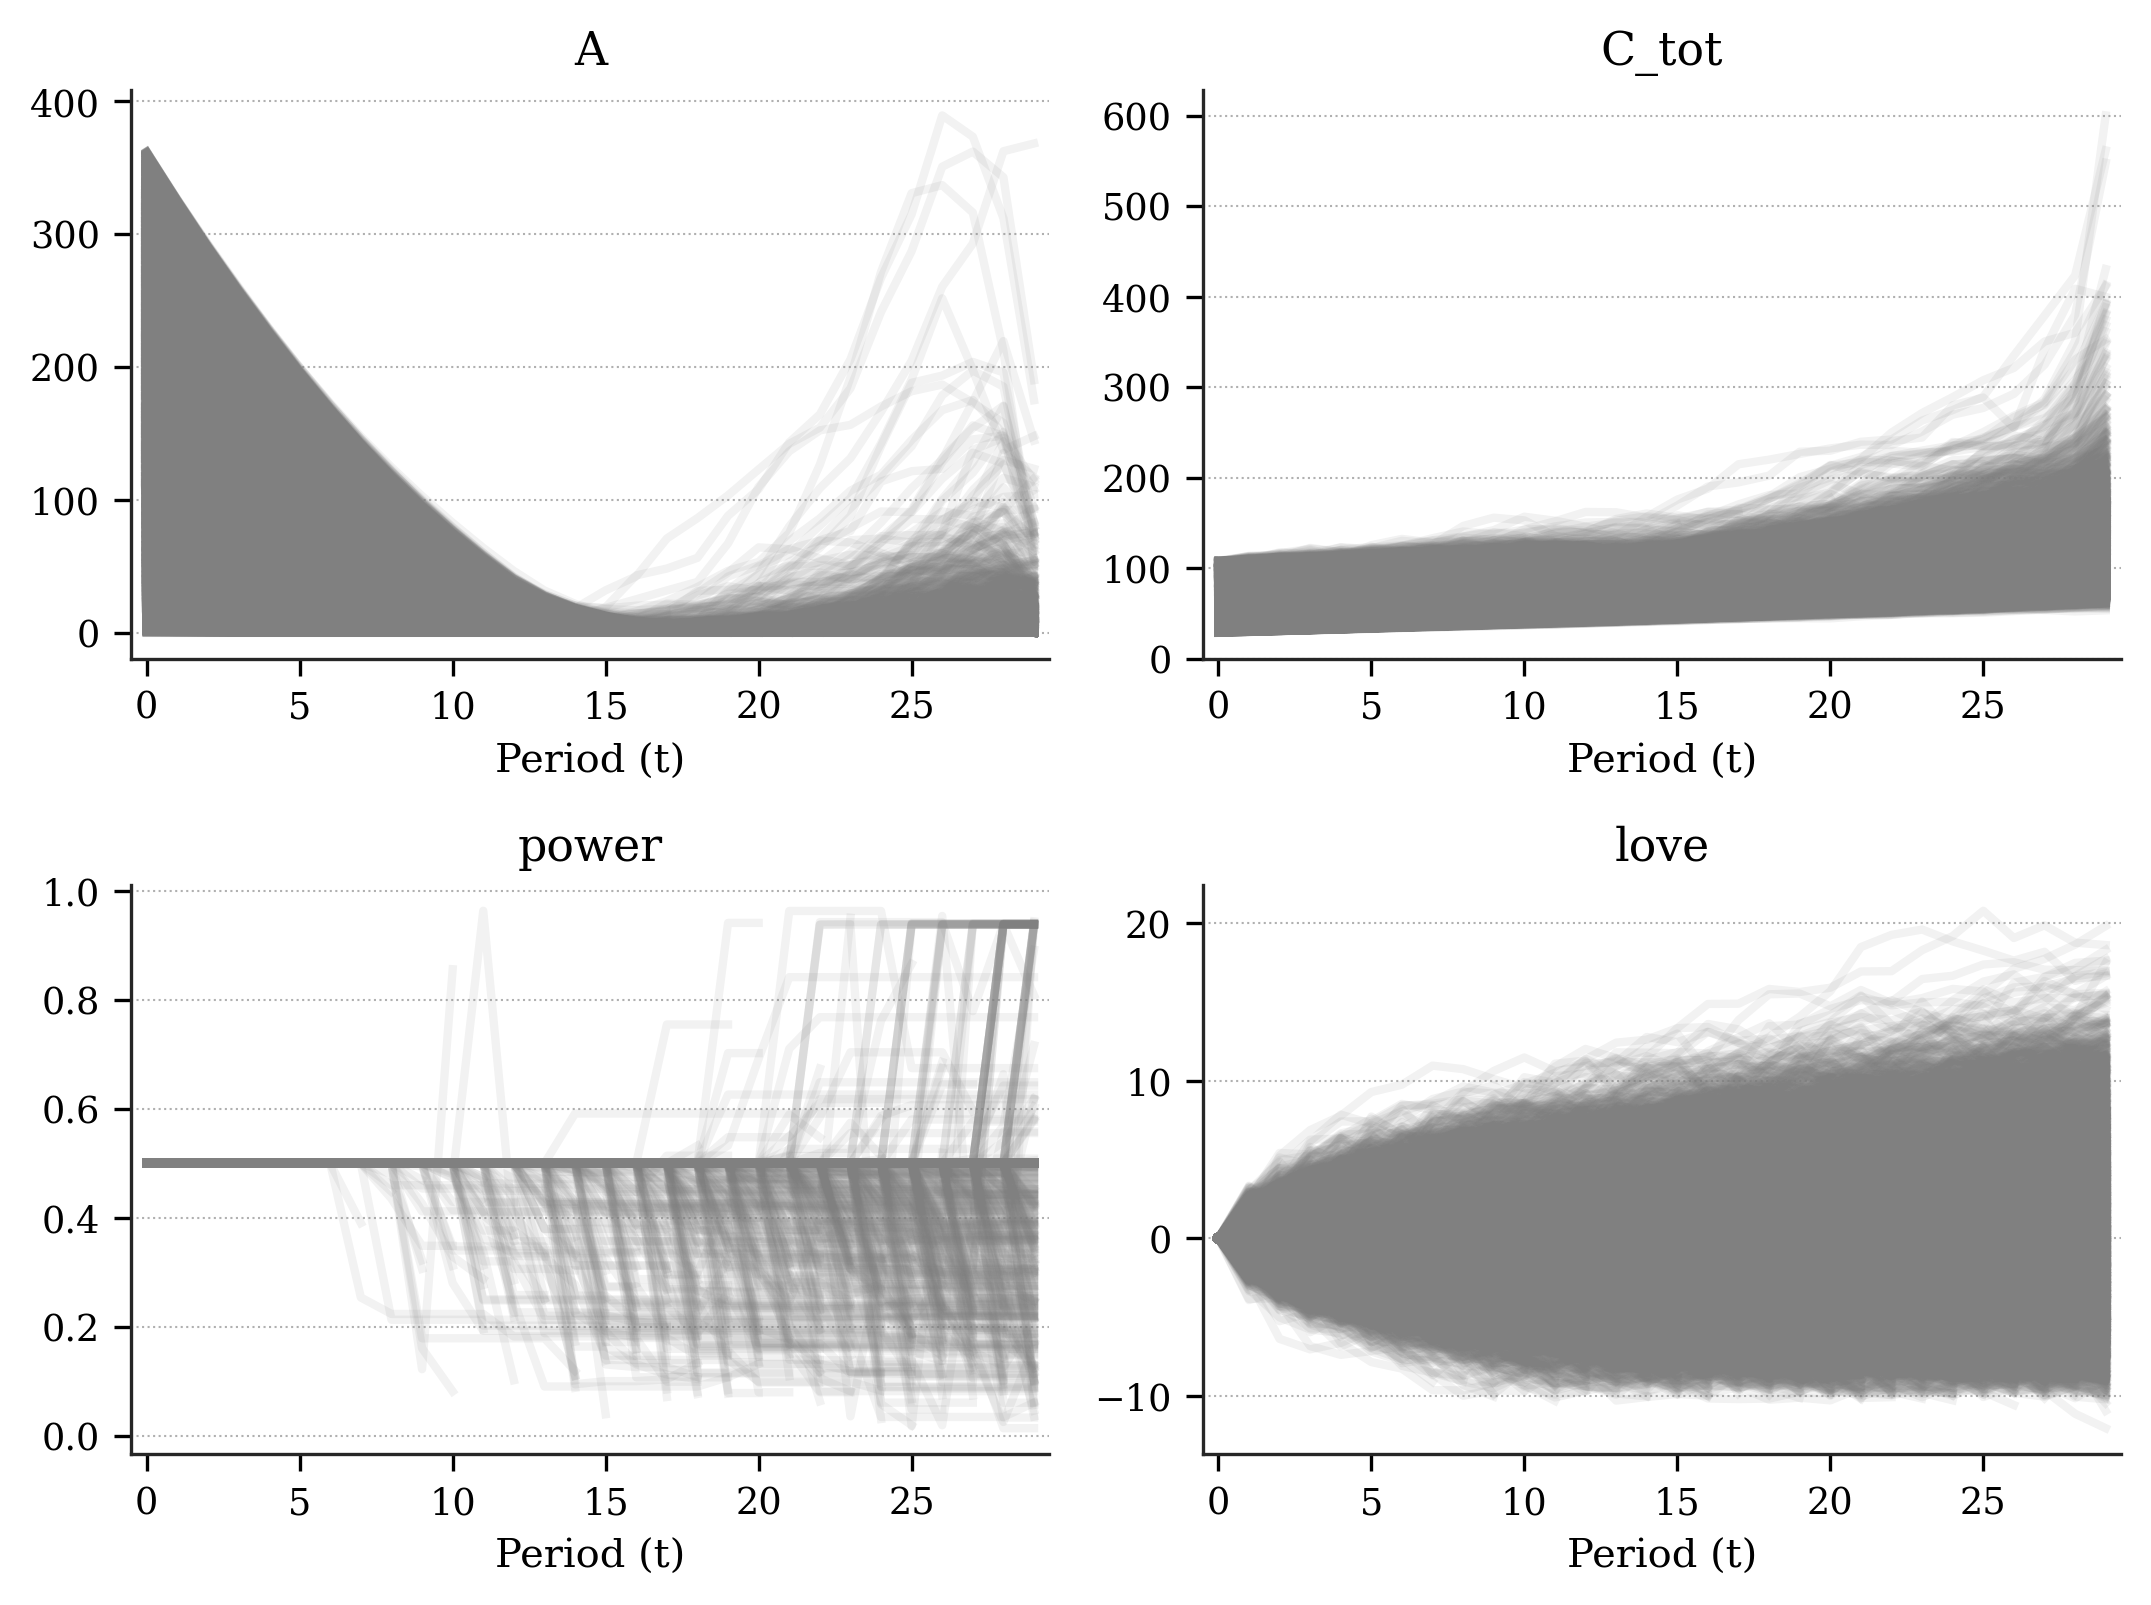

In [27]:
fig, ax = fm.create_figure(2,2,4)
mp_iEGM.plot_sim_couple(ax, agg_fct=None ,alpha=0.5)
if save_figures: fm.save_figure(filename="sim_test")
else: fig.tight_layout()